# Lectura del conjunto de datos

In [120]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [61]:
library(tidyverse)

In [62]:
df <- read_csv('df_precios_con_servicios (2).csv')

Rows: 98217 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): Direccion, Colonia, Municipio, Estado, Tipo, Web
dbl  (14): Estacionamientos, Precio_MXN, Superficie, Recamaras, Baños, Hospi...
lgl   (5): Seguridad, Balcon, Piscina, Jardin, Terraza
date  (1): Fecha

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [121]:
install.packages("knitr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [63]:
library(knitr)

# Exploración del conjunto de datos

In [64]:
kable(summary(df))



|   | Direccion       |Estacionamientos |  Precio_MXN      |  Superficie      |  Recamaras     |    Baños      |  Colonia        | Municipio       |   Estado        |    Fecha          |Seguridad     |  Balcon      | Piscina      |  Jardin      | Terraza      |    Tipo         |    Web          |  Hospitales   |   Escuelas   |Esparcimiento | Restaurantes  |   Carpetas   |  Transporte  |   Parques     |   Latitud    |   Longitud    |
|:--|:----------------|:----------------|:-----------------|:-----------------|:---------------|:--------------|:----------------|:----------------|:----------------|:------------------|:-------------|:-------------|:-------------|:-------------|:-------------|:----------------|:----------------|:--------------|:-------------|:-------------|:--------------|:-------------|:-------------|:--------------|:-------------|:--------------|
|   |Length:98217     |Min.   : 1.000   |Min.   :1.000e+00 |Min.   :      1.0 |Min.   :  1.000 |Min.   : 1.000 |Length:98217

In [65]:
nrow(df)

[1] 98217

In [66]:
df <- df %>% dplyr::select(where(is.numeric))

In [67]:
head(df)

Estacionamientos Precio_MXN Superficie Recamaras Baños Hospitales Escuelas
1 1                2586432     64        2         2      6         102     
2 1                1950000     46        1         1      1         139     
3 1                3400000    100        3         2      9         140     
4 2                3400000     78        3         2      6         102     
5 1                2300000     60        2         1      6         102     
6 1                2808291     52        2         1     NA          NA     
  Esparcimiento Restaurantes Carpetas Transporte Parques Latitud  Longitud 
1  2            719          2309     150        29      19.47045 -99.15667
2  2            681          2114     157        15      19.46888 -99.17294
3  5            728          2382     157        21      19.47312 -99.18457
4  2            719          2309     150        29      19.47045 -99.15667
5  2            719          2309     150        29      19.47045 -99.15667
6 NA             NA            NA      NA        NA            NA        NA

In [68]:
# NA por columna
colSums(is.na(df))
# Total de NA
# sum(is.na(df))

Estacionamientos       Precio_MXN       Superficie        Recamaras 
           20344                0             3644             2174 
           Baños       Hospitales         Escuelas    Esparcimiento 
            2604            20234            20234            20234 
    Restaurantes         Carpetas       Transporte          Parques 
           20234            20234            20234            21306 
         Latitud         Longitud 
           20239            20239

In [69]:
summary(df)

 Estacionamientos   Precio_MXN          Superficie          Recamaras      
 Min.   : 1.000   Min.   :1.000e+00   Min.   :      1.0   Min.   :  1.000  
 1st Qu.: 1.000   1st Qu.:3.950e+06   1st Qu.:     80.0   1st Qu.:  2.000  
 Median : 2.000   Median :6.594e+06   Median :    150.0   Median :  3.000  
 Mean   : 2.372   Mean   :1.948e+07   Mean   :    572.8   Mean   :  2.724  
 3rd Qu.: 3.000   3rd Qu.:1.200e+07   3rd Qu.:    300.0   3rd Qu.:  3.000  
 Max.   :78.000   Max.   :5.000e+11   Max.   :5000000.0   Max.   :366.000  
 NA's   :20344                        NA's   :3644        NA's   :2174     
     Baños          Hospitales        Escuelas     Esparcimiento  
 Min.   : 1.000   Min.   : 0.000   Min.   :  0.0   Min.   : 0.00  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 58.0   1st Qu.: 2.00  
 Median : 2.000   Median : 3.000   Median :102.0   Median : 5.00  
 Mean   : 2.428   Mean   : 7.468   Mean   :113.1   Mean   :17.87  
 3rd Qu.: 3.000   3rd Qu.:10.000   3rd Qu.:161.0   3rd Qu

Warning message:
“Removed 211954 rows containing non-finite outside the scale range
(`stat_bin()`).”


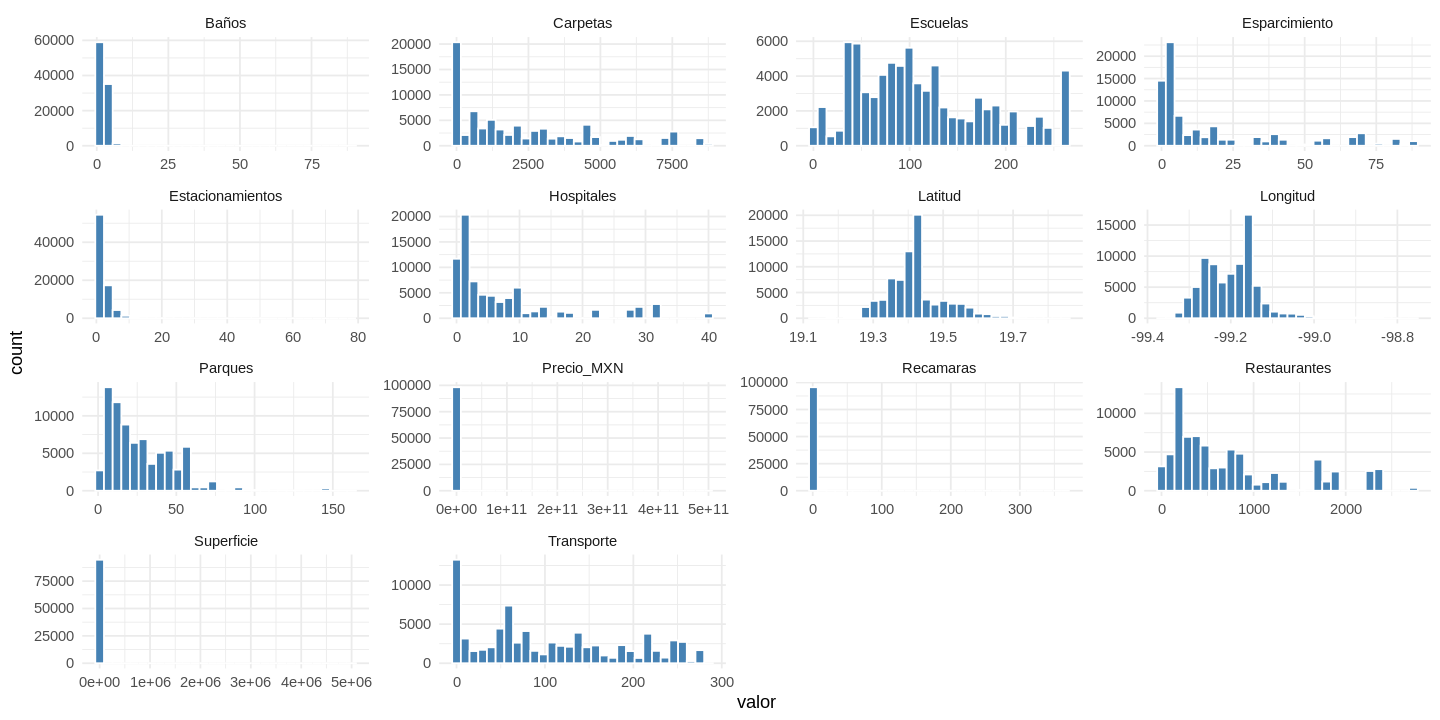

In [70]:
df %>%
  pivot_longer(cols = where(is.numeric), names_to = "variable", values_to = "valor") %>%
  ggplot(aes(x = valor)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  facet_wrap(~ variable, scales = "free") +
  theme_minimal()

Warning message:
“Removed 211954 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


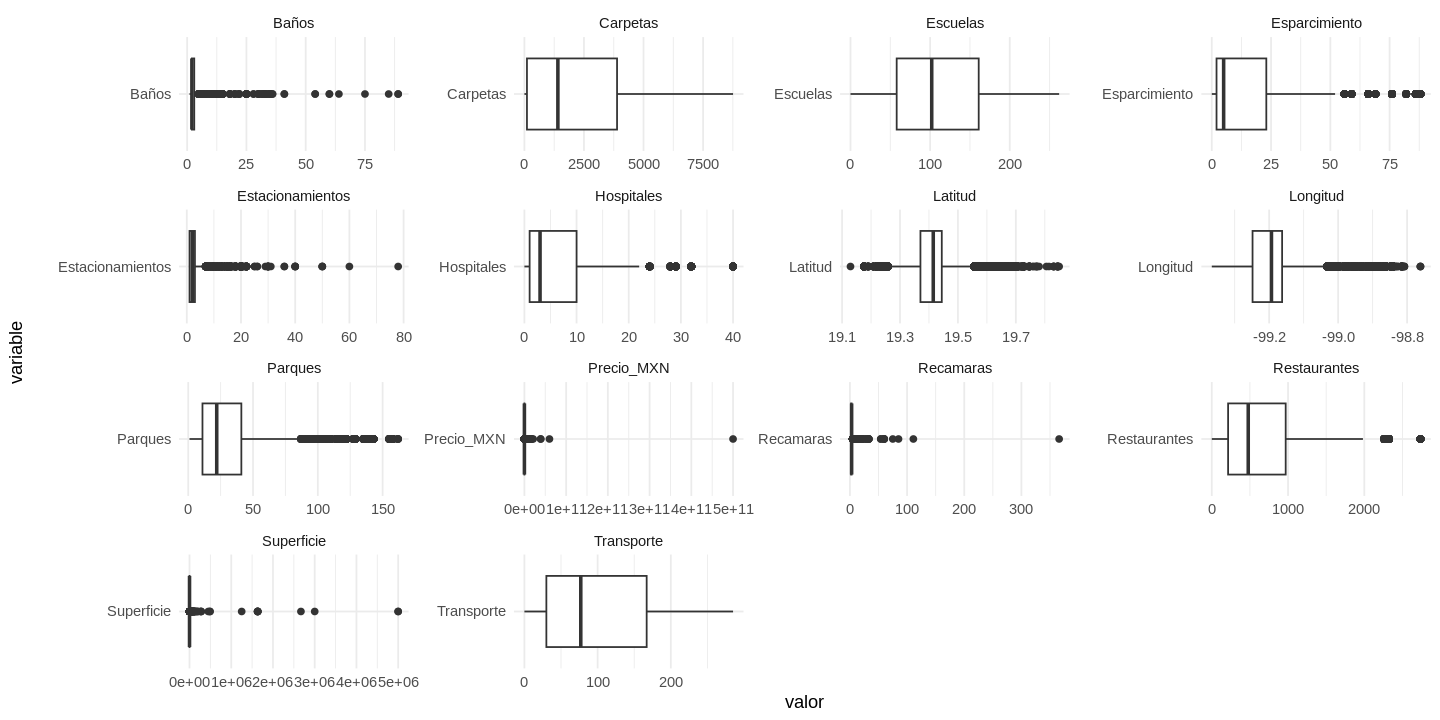

In [71]:
df %>%
  pivot_longer(cols = where(is.numeric), names_to = "variable", values_to = "valor") %>%
  ggplot(aes(x = valor, y = variable)) +
  geom_boxplot() +
  facet_wrap(~ variable, scales = "free") +
  theme_minimal()

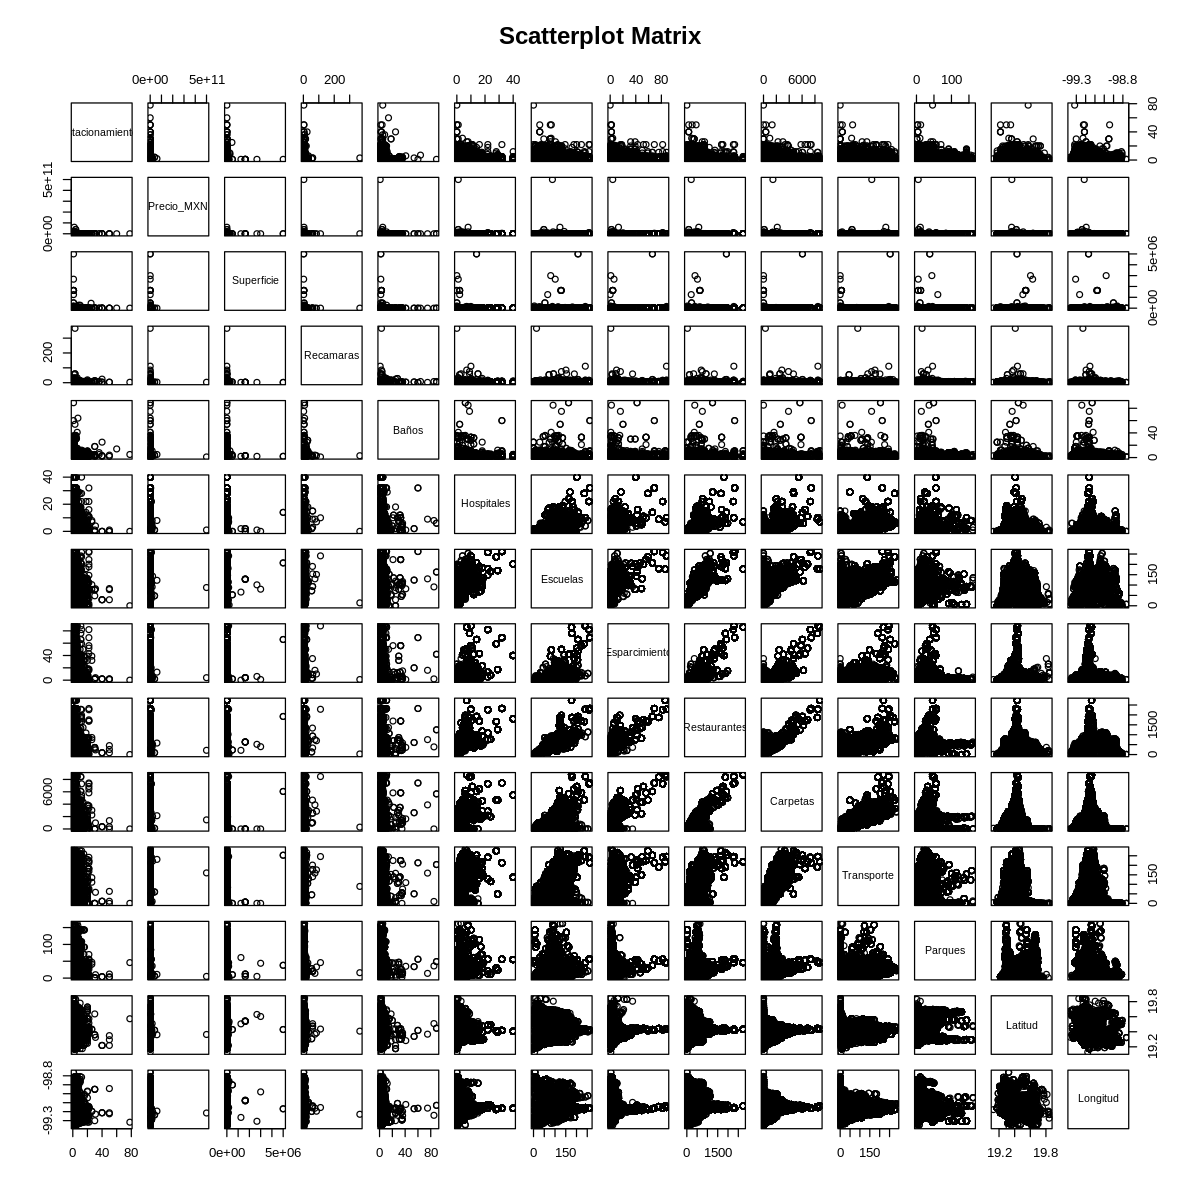

In [72]:
options(repr.plot.width=10, repr.plot.height=10)
pairs(df, main = "Scatterplot Matrix")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 211954 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 211954 rows containing missing values or values outside the scale range
(`geom_point()`).”


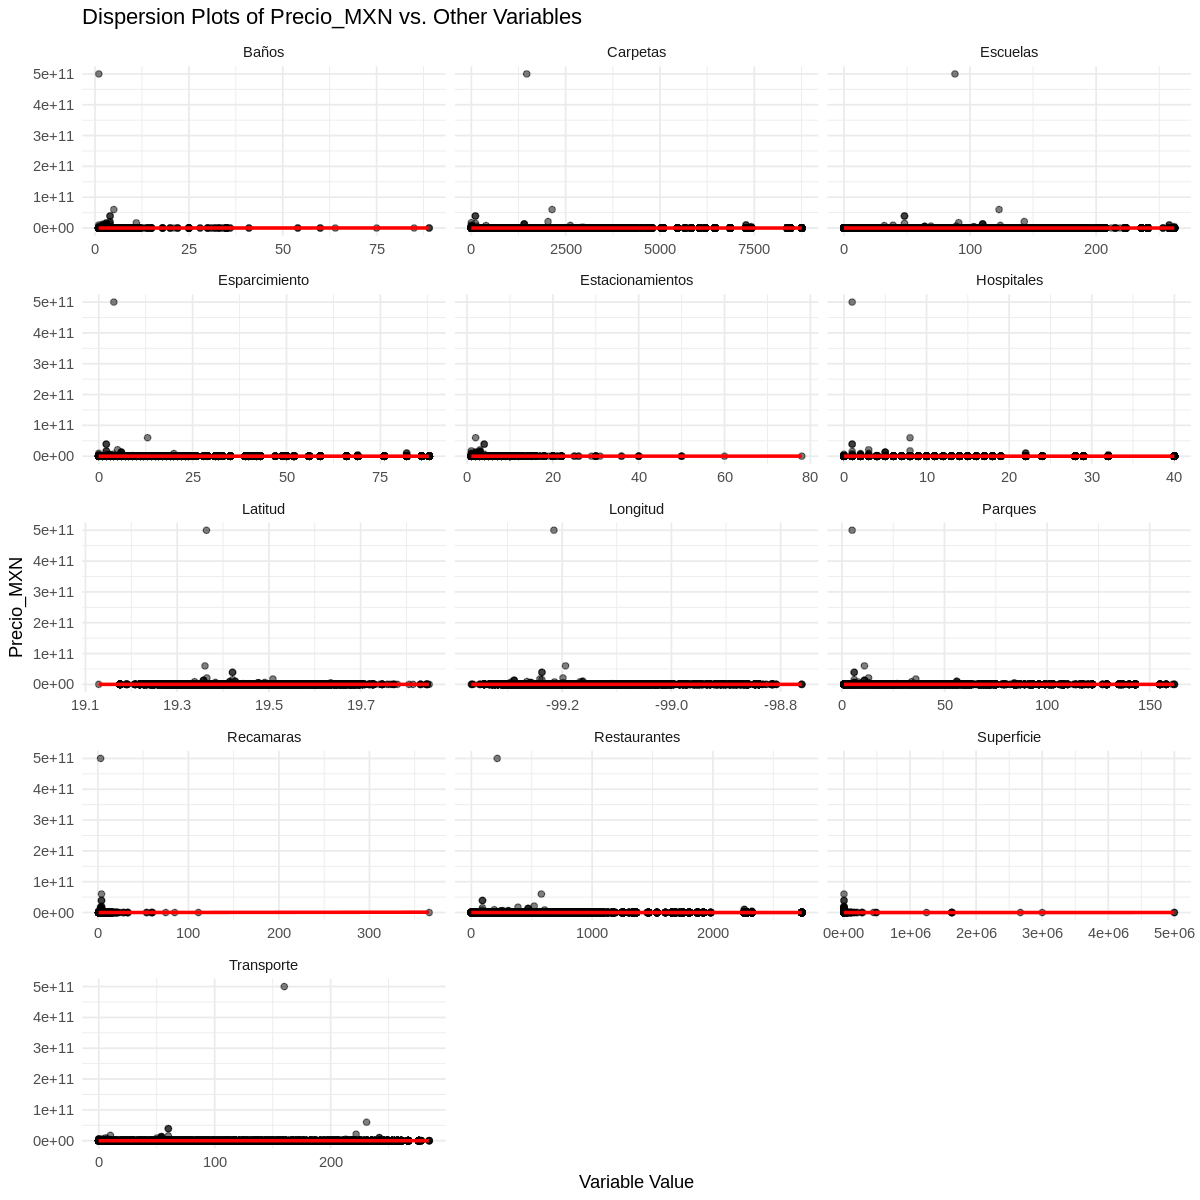

In [73]:
df %>%
  pivot_longer(cols = -Precio_MXN, names_to = "variable", values_to = "valor") %>%
  ggplot(aes(x = valor, y = Precio_MXN)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", col = "red", se = FALSE) +
  facet_wrap(~ variable, scales = "free_x", ncol = 3) +
  labs(title = "Dispersion Plots of Precio_MXN vs. Other Variables",
       x = "Variable Value",
       y = "Precio_MXN") +
  theme_minimal()

# Limpieza del conjunto de datos

In [74]:
df_checkpoint1 <- df

In [75]:
df <- df_checkpoint1

In [76]:
install.packages("dplyr")
library(dplyr)

df <- df %>%
  filter(
    Precio_MXN >= quantile(Precio_MXN, 0.06, na.rm = TRUE),
    Precio_MXN <= quantile(Precio_MXN, 0.94, na.rm = TRUE),
    Superficie >= quantile(Superficie, 0.05, na.rm = TRUE),
    Superficie <= quantile(Superficie, 0.95, na.rm = TRUE),
    Recamaras <= quantile(Recamaras, 0.99, na.rm = TRUE),
    Baños <= quantile(Baños, 0.99, na.rm = TRUE),
    Estacionamientos <= quantile(Estacionamientos, 0.99, na.rm = TRUE),

    Esparcimiento <= quantile(Esparcimiento, 0.95, na.rm = TRUE),
    Hospitales <= quantile(Hospitales, 0.95, na.rm = TRUE),
    Escuelas <= quantile(Escuelas, 0.95, na.rm = TRUE),
    Restaurantes <= quantile(Restaurantes, 0.95, na.rm = TRUE),
    Carpetas <= quantile(Carpetas, 0.95, na.rm = TRUE),
    Transporte <= quantile(Transporte, 0.95, na.rm = TRUE),
    Parques <= quantile(Parques, 0.95, na.rm = TRUE),

  )


In [77]:
nrow(df)

[1] 40834

In [78]:
summary(df)

 Estacionamientos   Precio_MXN         Superficie    Recamaras    
 Min.   : 1.000   Min.   : 1850000   Min.   : 49   Min.   :1.000  
 1st Qu.: 1.000   1st Qu.: 4500000   1st Qu.: 92   1st Qu.:2.000  
 Median : 2.000   Median : 7000000   Median :170   Median :3.000  
 Mean   : 2.259   Mean   : 8846648   Mean   :208   Mean   :2.739  
 3rd Qu.: 3.000   3rd Qu.:11950000   3rd Qu.:290   3rd Qu.:3.000  
 Max.   :10.000   Max.   :28512017   Max.   :694   Max.   :6.000  
                                                                  
     Baños         Hospitales       Escuelas      Esparcimiento  
 Min.   :1.000   Min.   : 0.00   Min.   :  0.00   Min.   : 0.00  
 1st Qu.:2.000   1st Qu.: 1.00   1st Qu.: 54.00   1st Qu.: 2.00  
 Median :2.000   Median : 3.00   Median : 91.00   Median : 4.00  
 Mean   :2.445   Mean   : 5.43   Mean   : 97.83   Mean   :11.28  
 3rd Qu.:3.000   3rd Qu.: 8.00   3rd Qu.:130.00   3rd Qu.:17.00  
 Max.   :6.000   Max.   :29.00   Max.   :253.00   Max.   :66.00  
  

Warning message:
“Removed 4 rows containing non-finite outside the scale range (`stat_bin()`).”


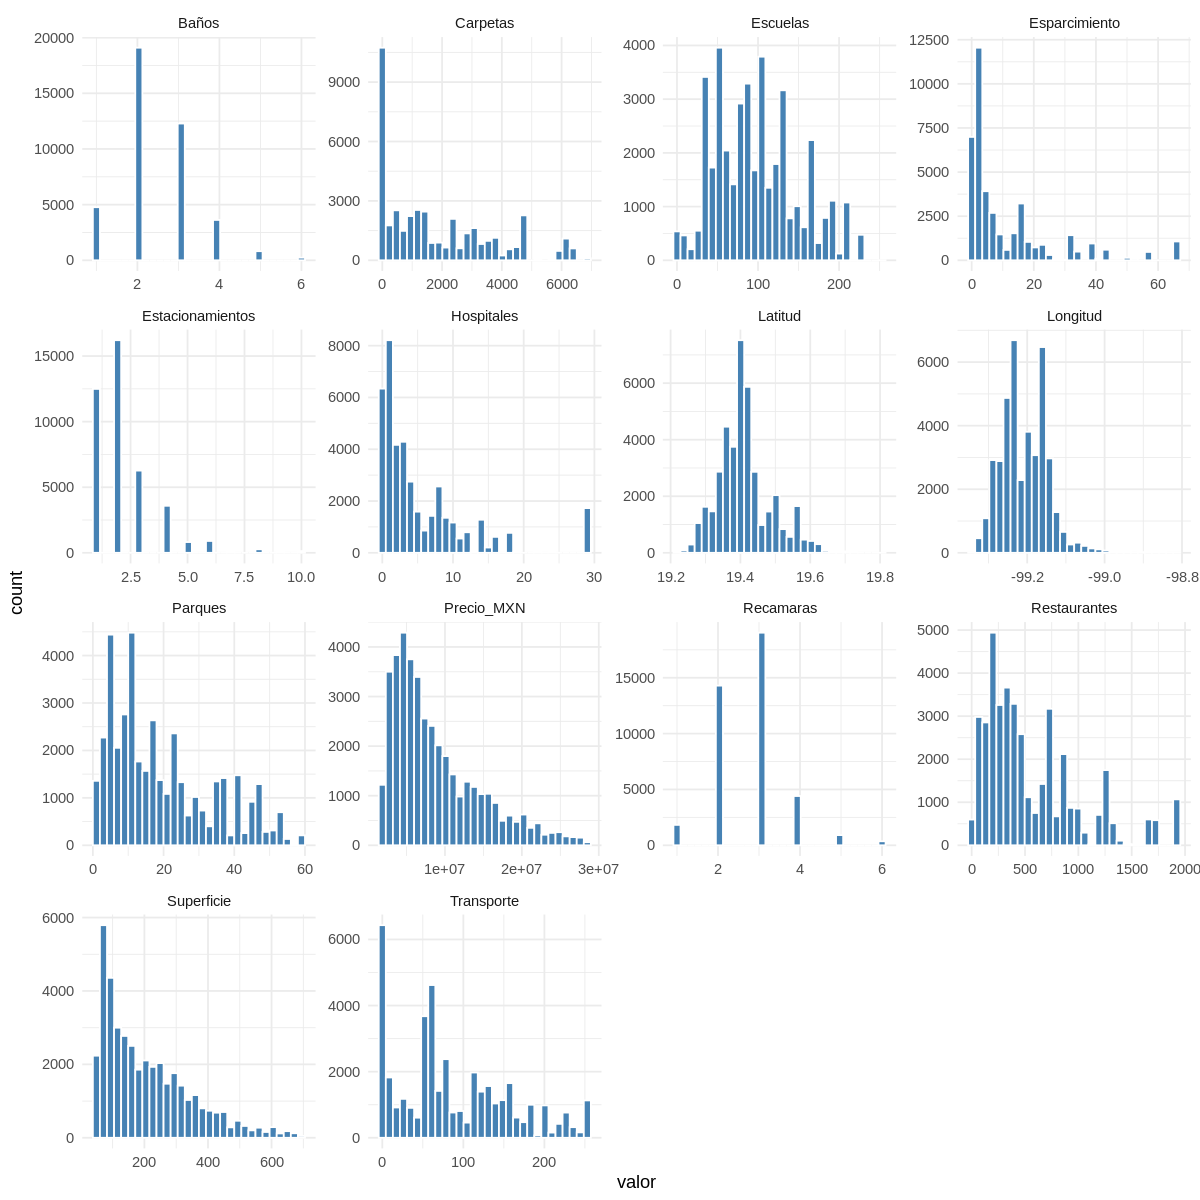

In [79]:
df %>%
  pivot_longer(cols = where(is.numeric), names_to = "variable", values_to = "valor") %>%
  ggplot(aes(x = valor)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  facet_wrap(~ variable, scales = "free") +
  theme_minimal()

Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


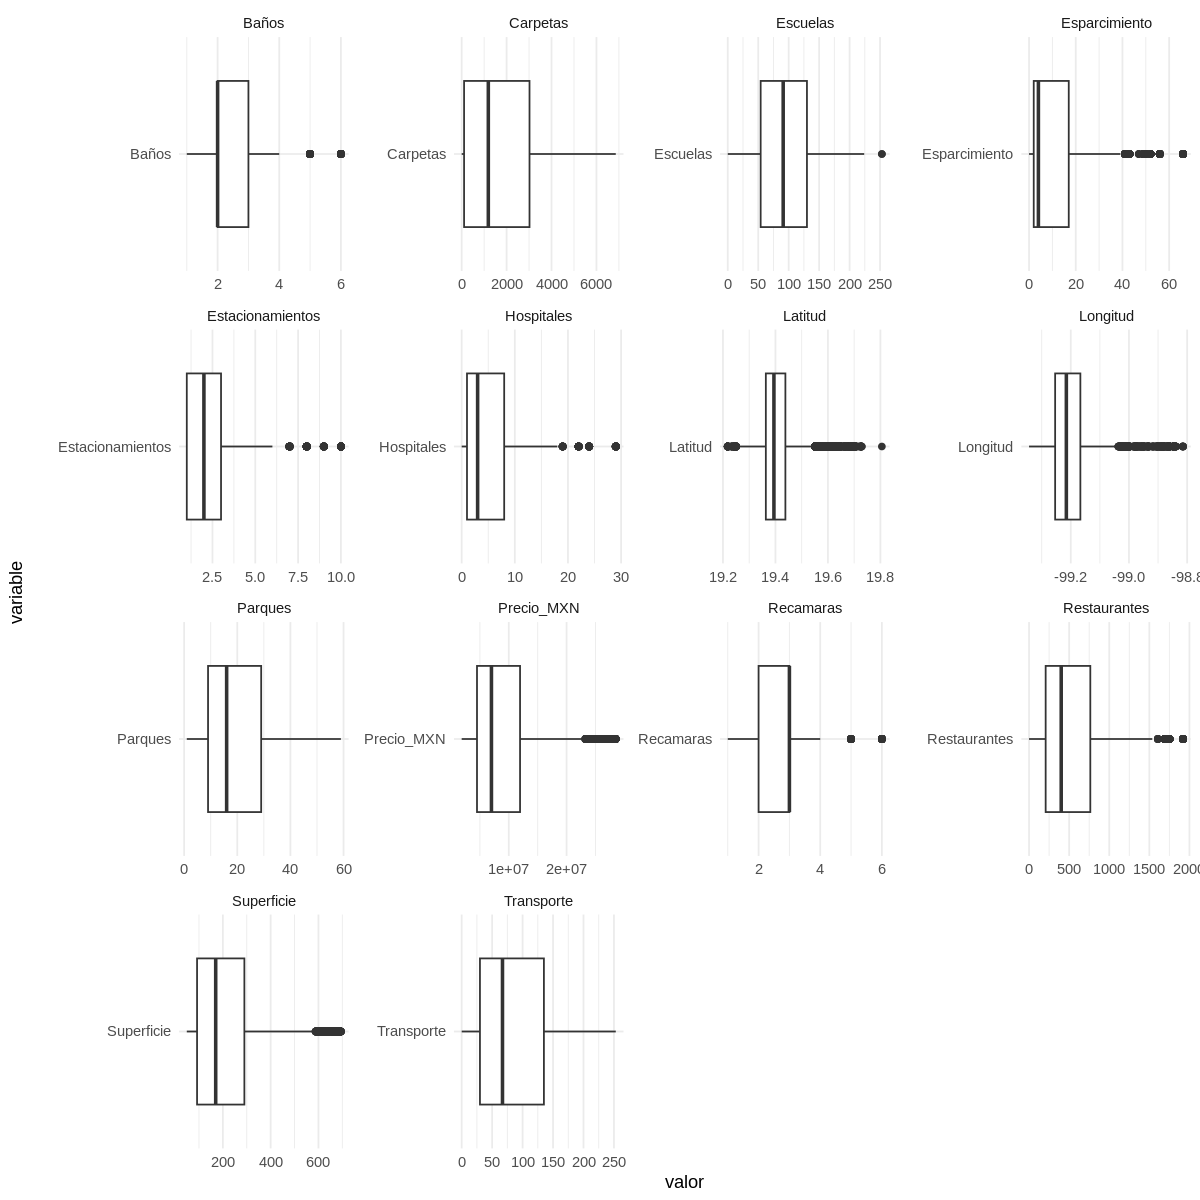

In [80]:
df %>%
  pivot_longer(cols = where(is.numeric), names_to = "variable", values_to = "valor") %>%
  ggplot(aes(x = valor, y = variable)) +
  geom_boxplot() +
  facet_wrap(~ variable, scales = "free") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


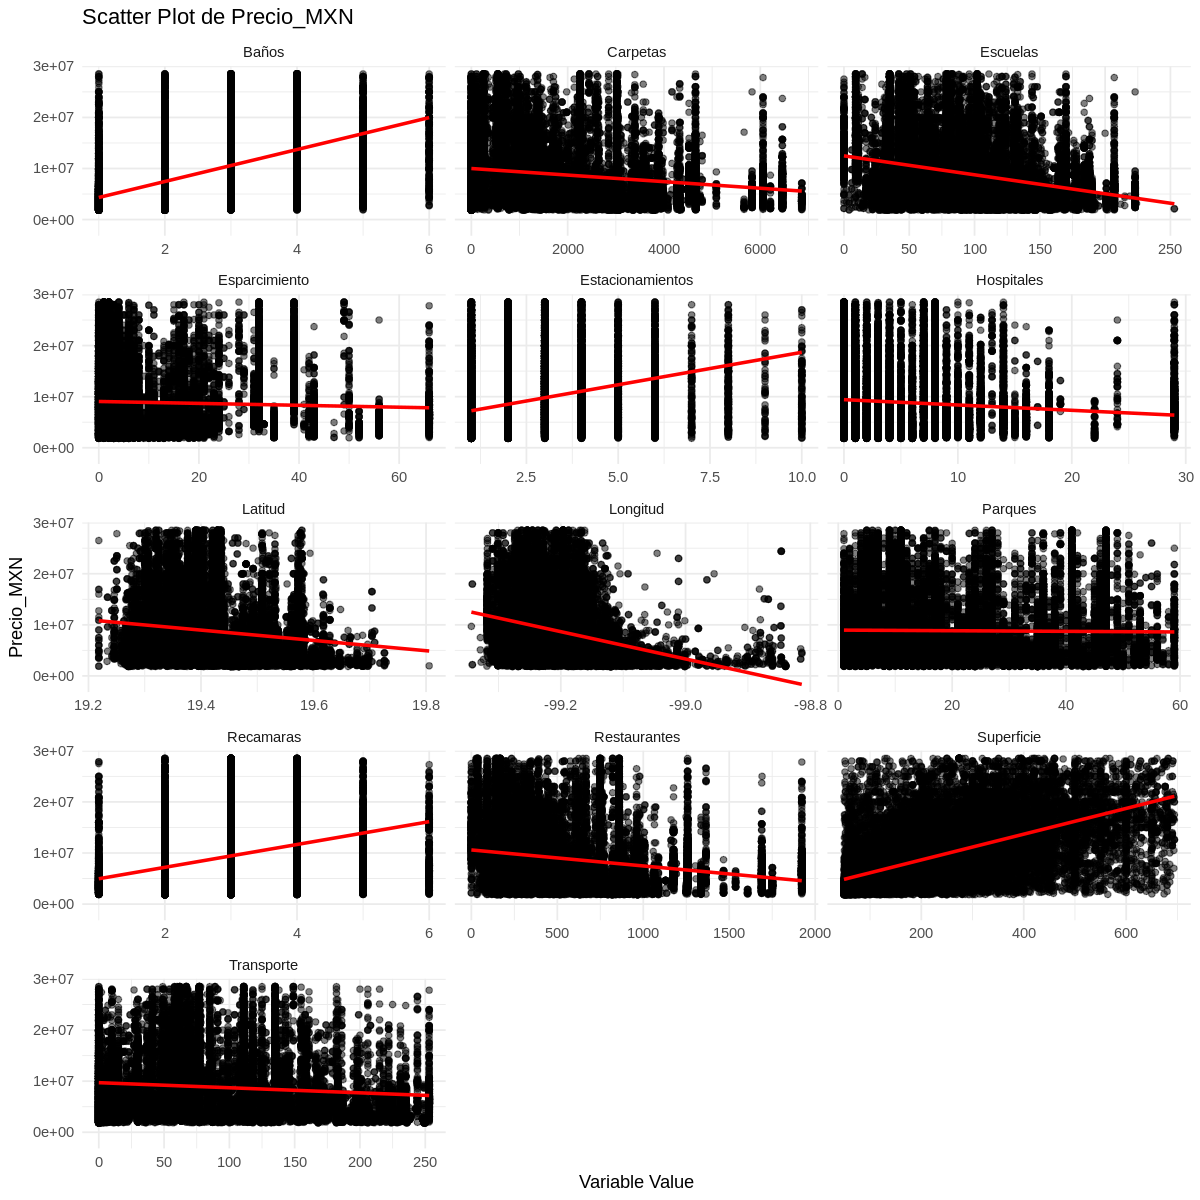

In [81]:
df %>%
  pivot_longer(cols = -Precio_MXN, names_to = "variable", values_to = "valor") %>%
  ggplot(aes(x = valor, y = Precio_MXN)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", col = "red", se = FALSE) +
  facet_wrap(~ variable, scales = "free_x", ncol = 3) +
  labs(title = "Scatter Plot de Precio_MXN",
       x = "Variable Value",
       y = "Precio_MXN") +
  theme_minimal()

In [82]:
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



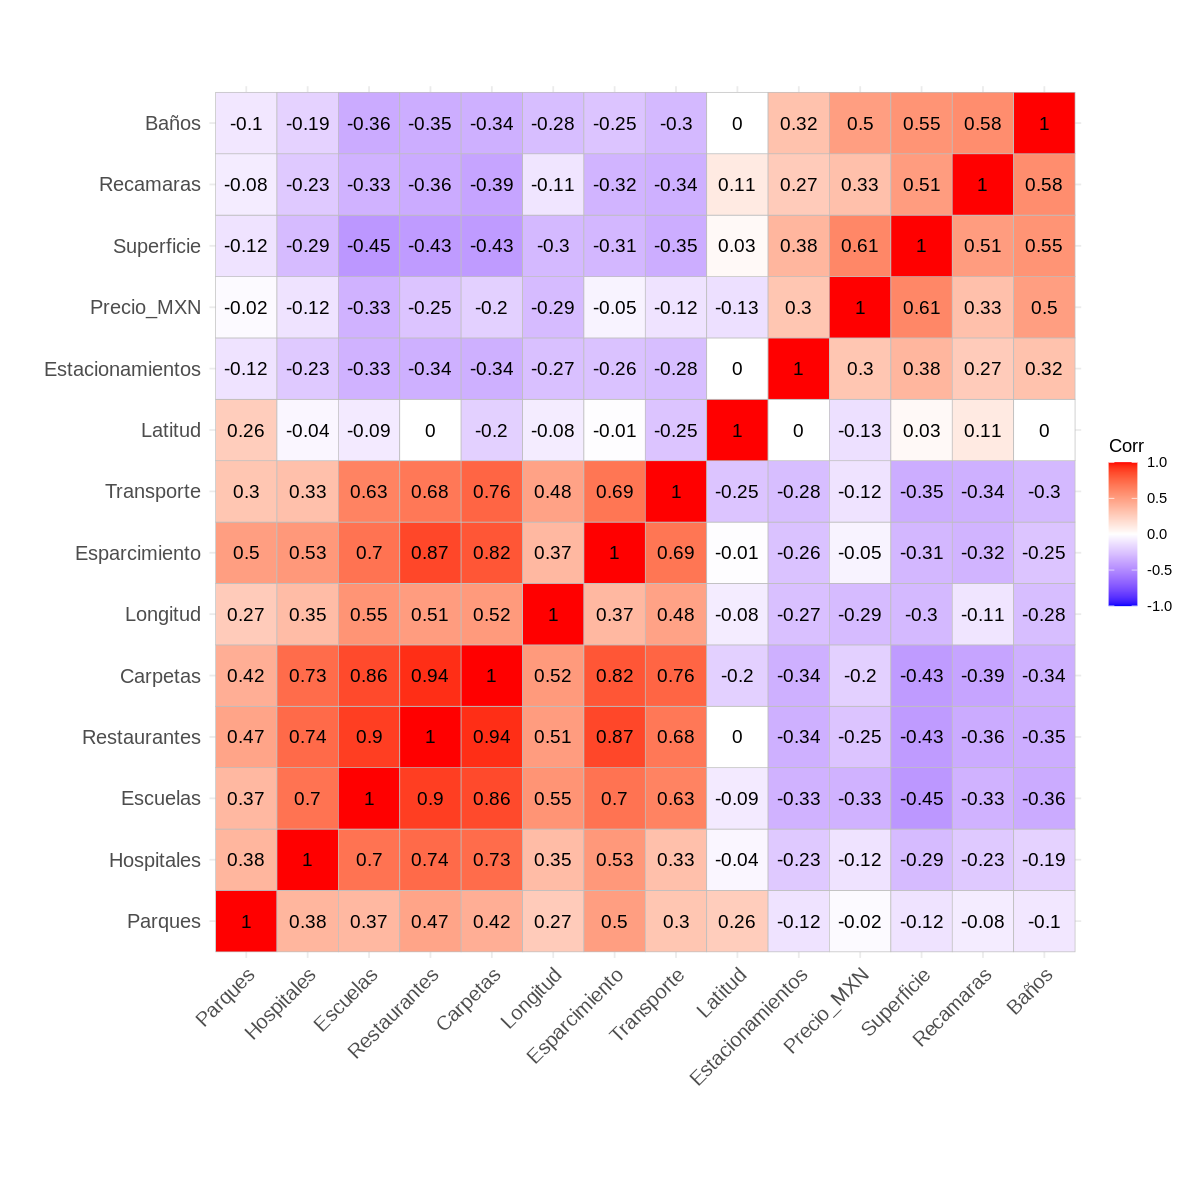

In [83]:
corr <- cor(df, use = "complete.obs", method = "pearson")

options(repr.plot.width = 10, repr.plot.height = 10)
ggcorrplot(corr,
           hc.order = TRUE,
           lab = TRUE,
           colors = c("blue", "white", "red"))

# Transformación log de precio

In [84]:
df_checkpoint2 <- df

In [85]:
df <- df_checkpoint2

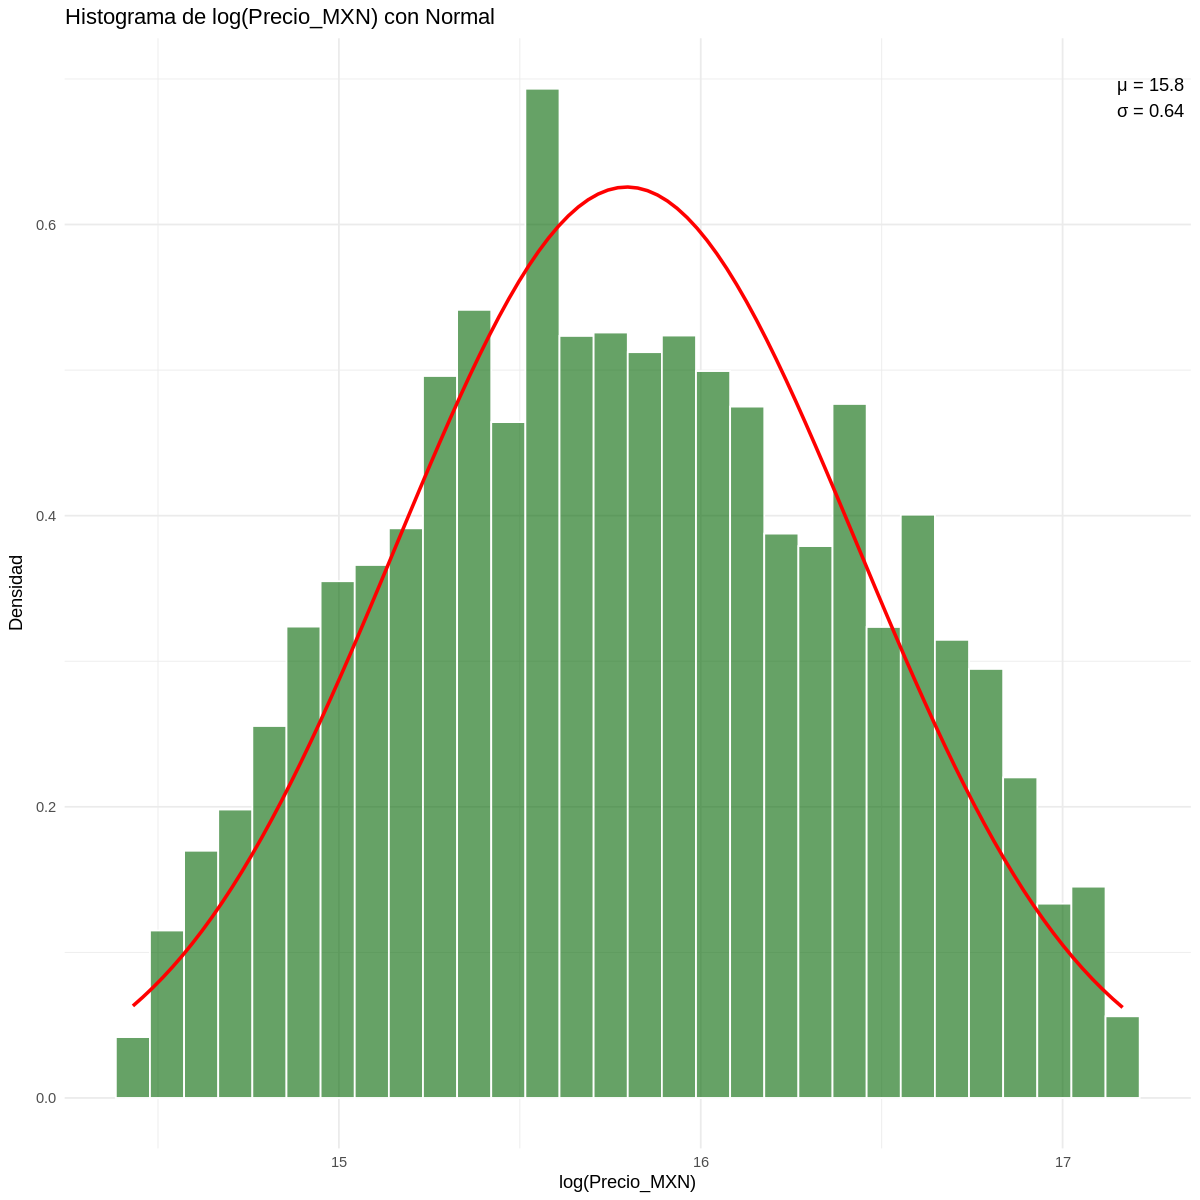

In [86]:
install.packages("ggplot2")
install.packages("MASS")
library(ggplot2)
library(MASS)

log_precio <- log(df$Precio_MXN)

mu_log  <- mean(log_precio)
sd_log  <- sd(log_precio)

ggplot(df, aes(x = log_precio)) +
  geom_histogram(
    aes(y = after_stat(density)),
    bins = 30,
    fill = "darkgreen",
    color = "white",
    alpha = 0.6
  ) +
  stat_function(
    fun = dnorm,
    args = list(mean = mu_log, sd = sd_log),
    color = "red",
    linewidth = 1
  ) +
  labs(
    title = "Histograma de log(Precio_MXN) con Normal",
    x = "log(Precio_MXN)",
    y = "Densidad"
  ) +
  annotate(
    "text",
    x = Inf, y = Inf,
    hjust = 1.1, vjust = 2,
    label = paste0(
      "μ = ", round(mu_log, 2),
      "\nσ = ", round(sd_log, 2)
    )
  ) +
  theme_minimal()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Fitting of the distribution ' norm ' by maximum likelihood 
Parameters:
       estimate  Std. Error
mean 15.7957791 0.003154876
sd    0.6375192 0.002230810

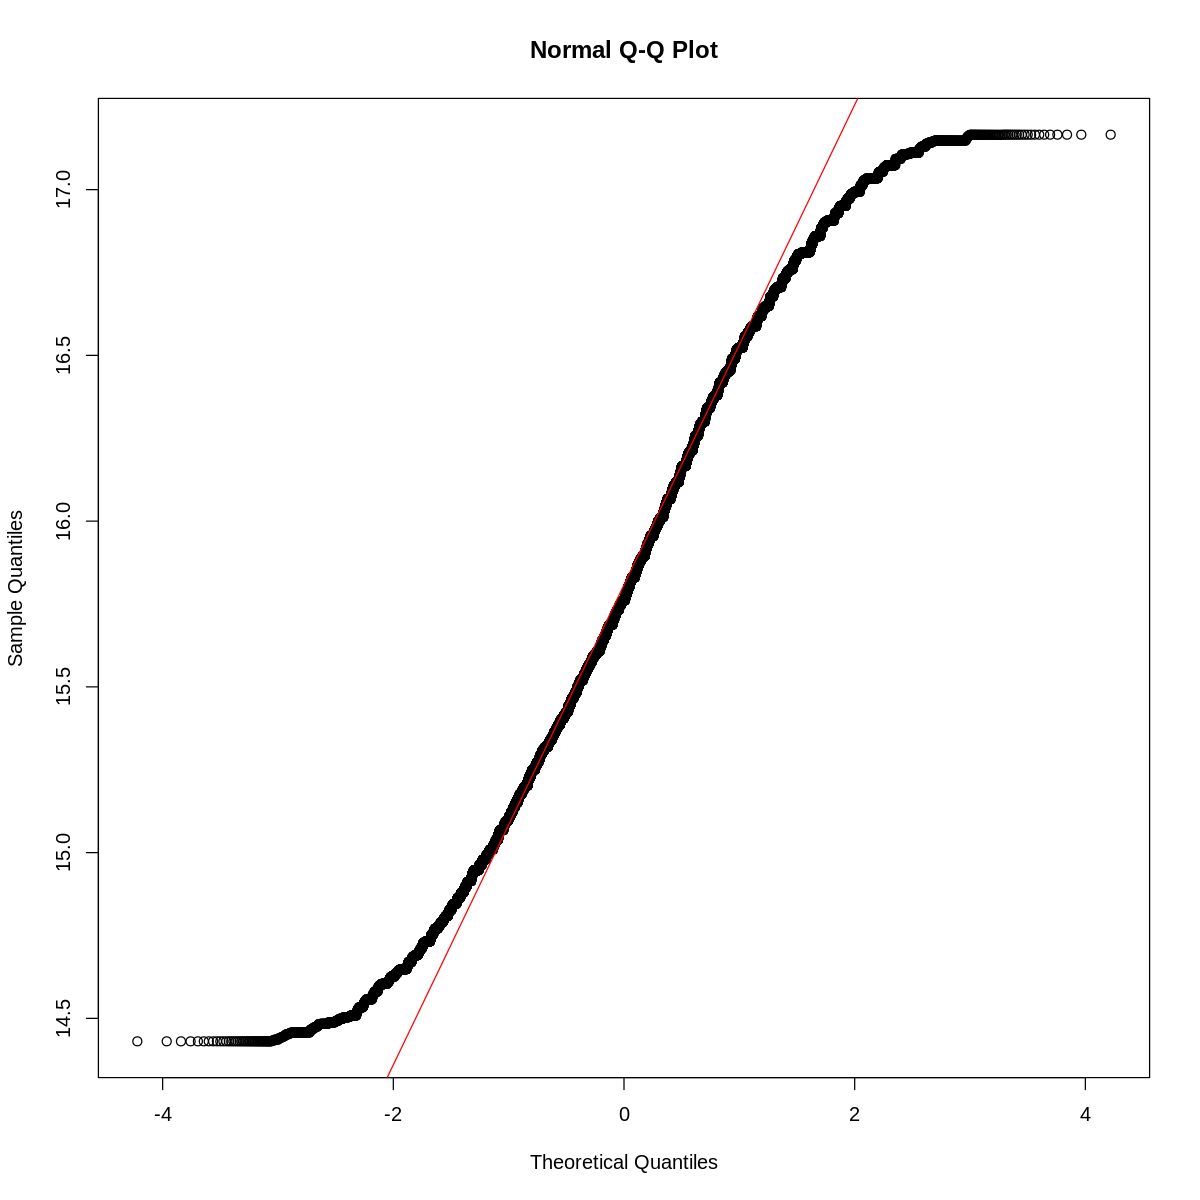

In [87]:
install.packages("fitdistrplus")
library(fitdistrplus)

x_log <- log(df$Precio_MXN)

fit_norm_log <- fitdist(x_log, "norm")

qqnorm(x_log)
qqline(x_log, col = "red")

fit_norm_log

# Regresión lineal múltiple


Call:
lm(formula = log(Precio_MXN) ~ Estacionamientos + Superficie + 
    Recamaras + Baños + Latitud + Longitud + Hospitales + Escuelas + 
    Esparcimiento + Transporte + Parques, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.29448 -0.24798 -0.00207  0.24761  2.33926 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.495e+02  4.129e+00 -36.199  < 2e-16 ***
Estacionamientos  2.177e-02  1.645e-03  13.236  < 2e-16 ***
Superficie        1.871e-03  1.924e-05  97.226  < 2e-16 ***
Recamaras         4.862e-02  3.145e-03  15.460  < 2e-16 ***
Baños             1.593e-01  2.946e-03  54.072  < 2e-16 ***
Latitud          -1.718e+00  2.959e-02 -58.077  < 2e-16 ***
Longitud         -1.994e+00  4.132e-02 -48.250  < 2e-16 ***
Hospitales        2.130e-02  4.445e-04  47.924  < 2e-16 ***
Escuelas         -4.952e-03  7.696e-05 -64.342  < 2e-16 ***
Esparcimiento     1.369e-02  2.304e-04  59.428  < 2e-16 ***
Transporte        8.620e-04

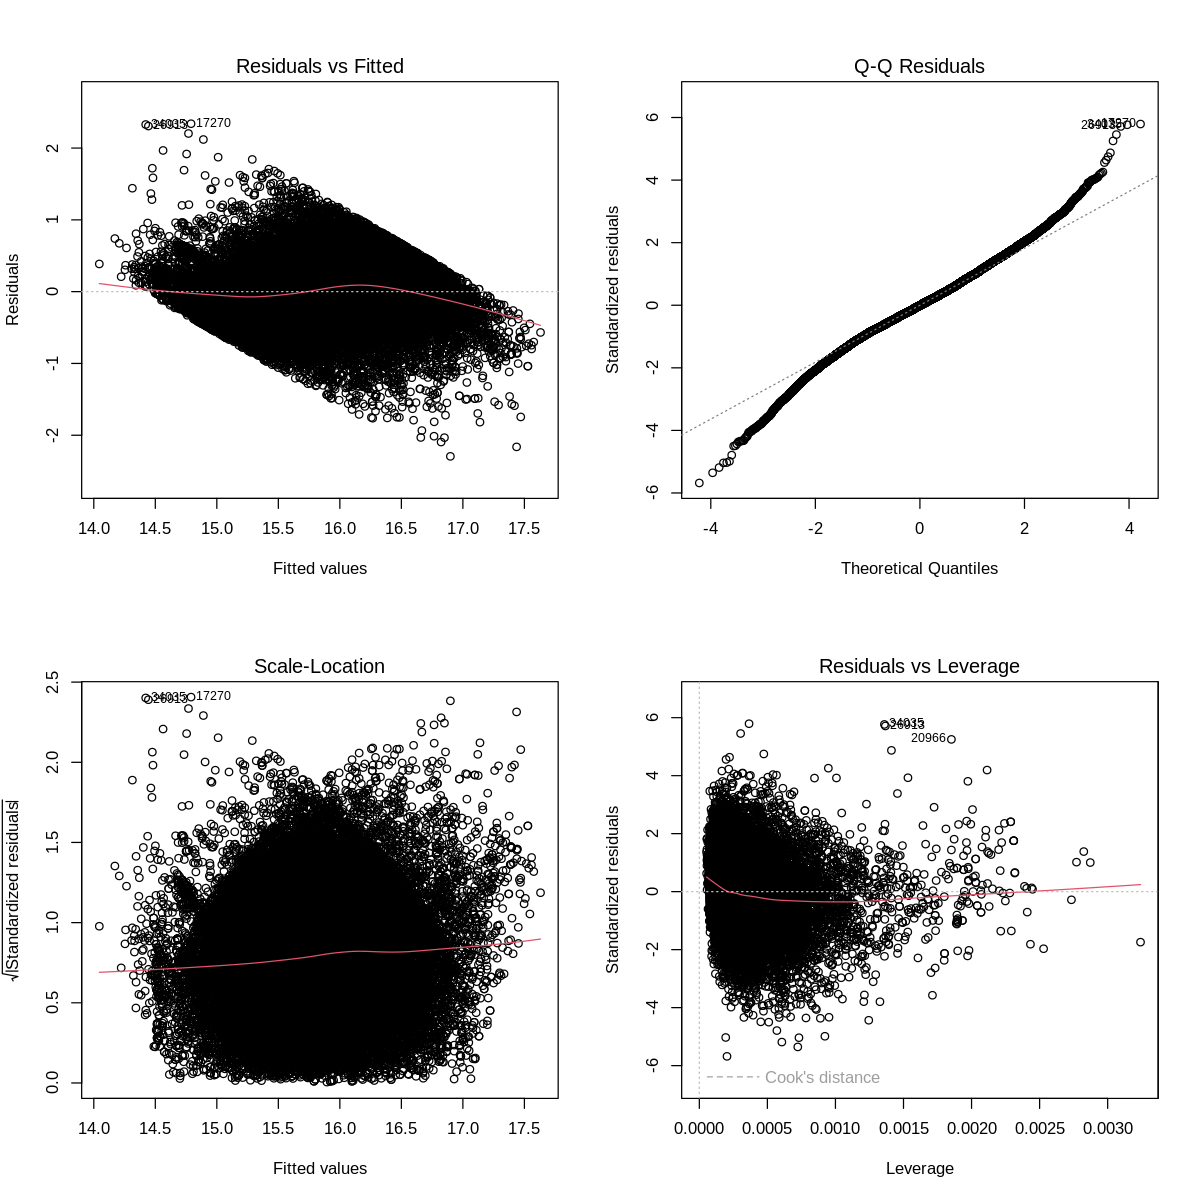

In [88]:
lm.log <- lm(
  log(Precio_MXN) ~ Estacionamientos + Superficie + Recamaras + Baños +
    Latitud + Longitud + Hospitales + Escuelas +
    Esparcimiento + Transporte + Parques,
  data = df
)
summary(lm.log)
par(mfrow=c(2,2)); plot(lm.log); par(mfrow=c(1,1))


# Mejor  subconjunto

In [89]:
install.packages("leaps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [90]:
library(leaps)

In [91]:
regfit.full <- regsubsets(Precio_MXN ~ ., df)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Precio_MXN ~ ., df)
13 Variables  (and intercept)
                 Forced in Forced out
Estacionamientos     FALSE      FALSE
Superficie           FALSE      FALSE
Recamaras            FALSE      FALSE
Baños                FALSE      FALSE
Hospitales           FALSE      FALSE
Escuelas             FALSE      FALSE
Esparcimiento        FALSE      FALSE
Restaurantes         FALSE      FALSE
Carpetas             FALSE      FALSE
Transporte           FALSE      FALSE
Parques              FALSE      FALSE
Latitud              FALSE      FALSE
Longitud             FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         Estacionamientos Superficie Recamaras Baños Hospitales Escuelas
1  ( 1 ) " "              "*"        " "       " "   " "        " "     
2  ( 1 ) " "              "*"        " "       "*"   " "        " "     
3  ( 1 ) " "              "*"        " "       " "   " "        "*"     
4  ( 1 ) " "  

In [92]:
regfit.full <- regsubsets(Precio_MXN ~ ., data = df,
    nvmax = 14)
reg.summary <- summary(regfit.full)

names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [93]:
reg.summary$rsq

[1] 0.3704548 0.4119458 0.4411544 0.4792421 0.5080478 0.5195719 0.5243078
 [8] 0.5277494 0.5326218 0.5346176 0.5358659 0.5361279 0.5361853

In [94]:
options(repr.plot.width=12, repr.plot.height=6)

[1] 13

[1] 13

[1] 12

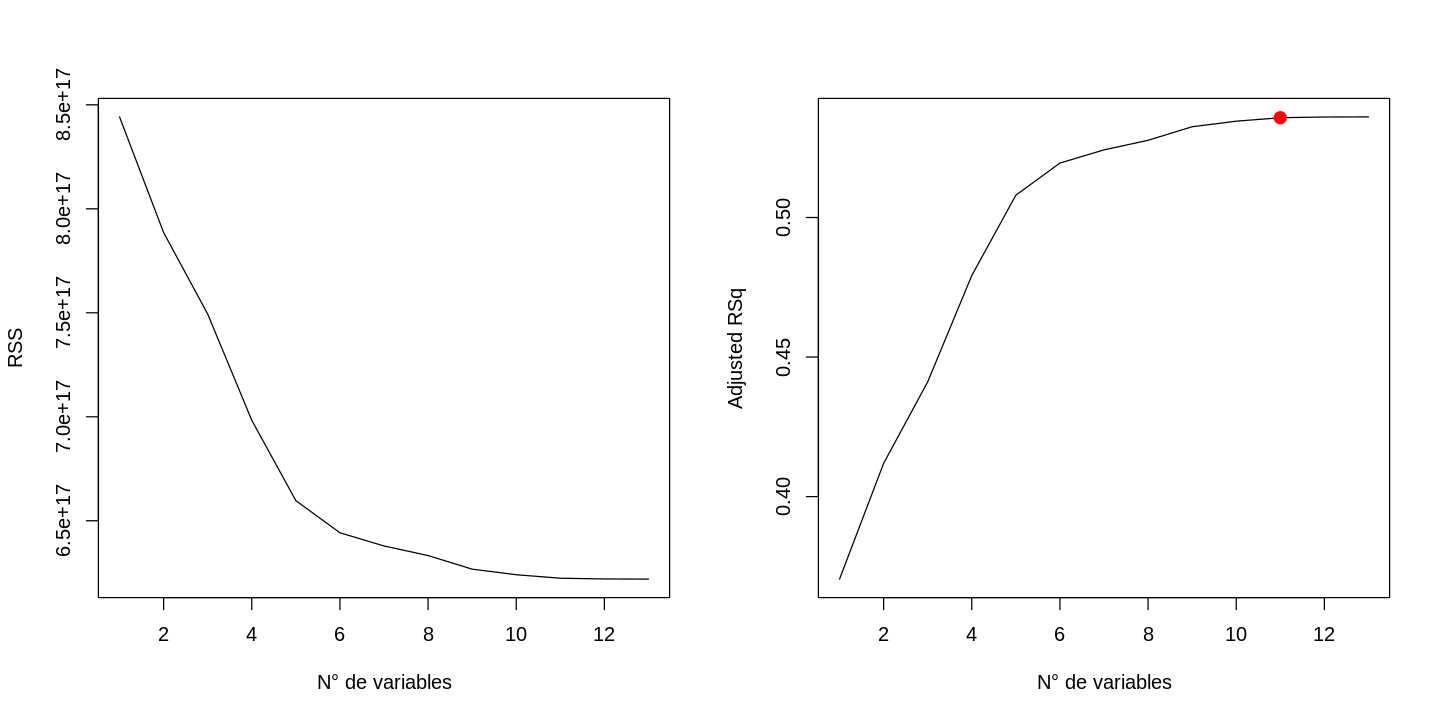

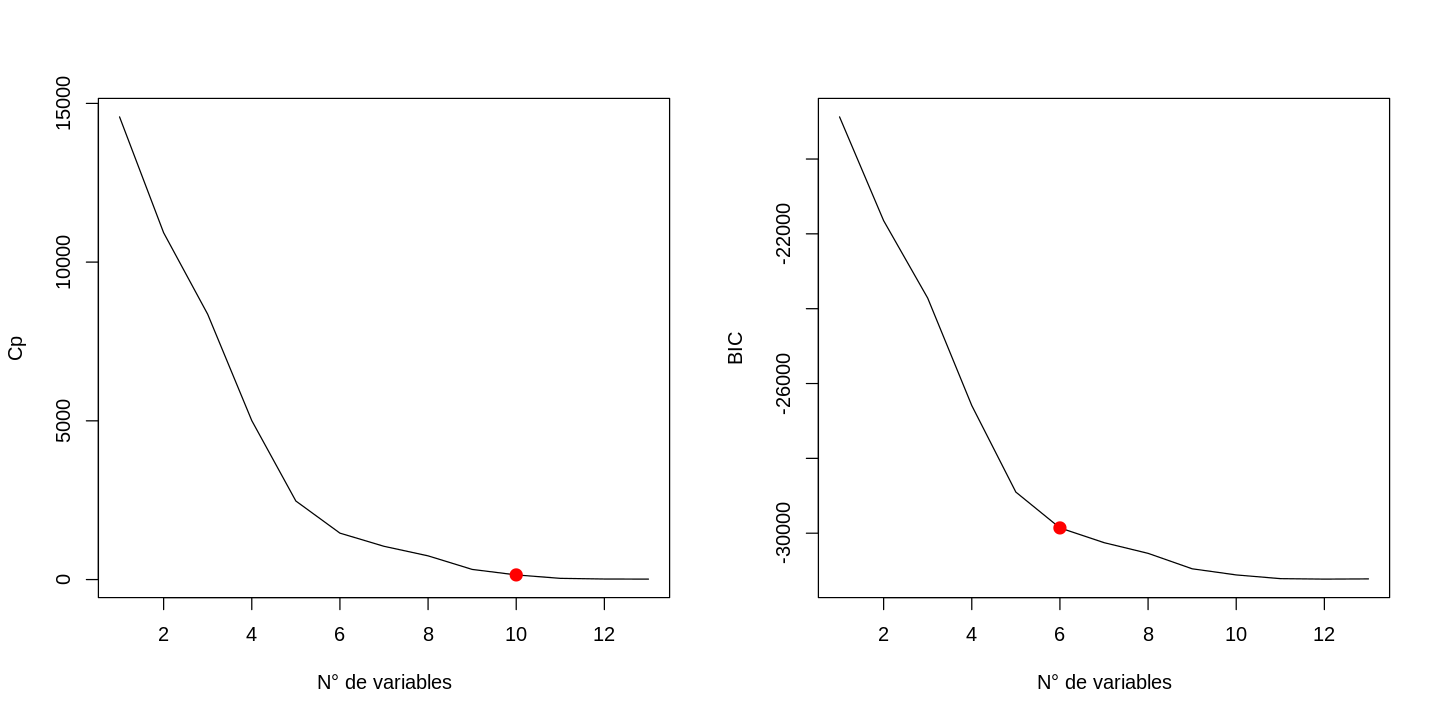

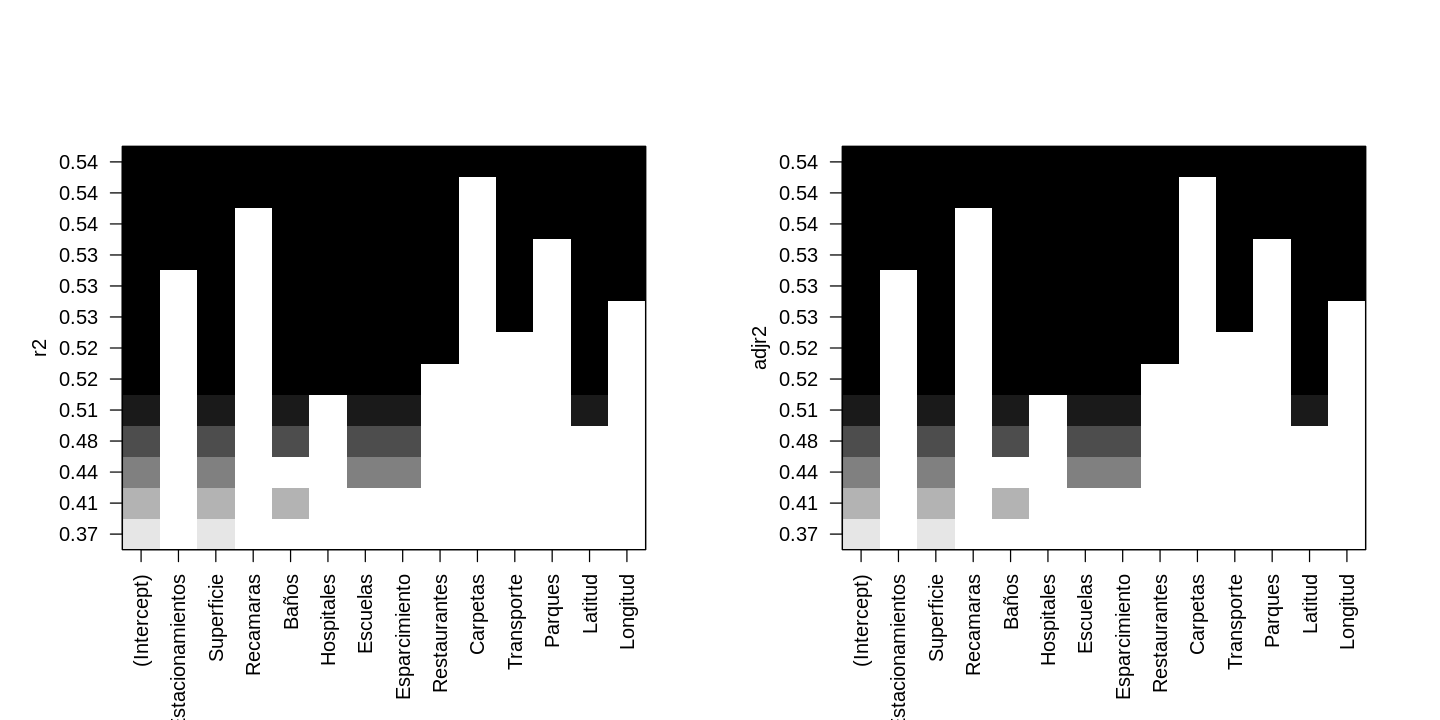

(Intercept)    Superficie         Baños    Hospitales      Escuelas 
 257171788.27      19065.99    1367165.05     129894.71     -47835.31 
Esparcimiento       Latitud 
    139146.29  -13045023.97

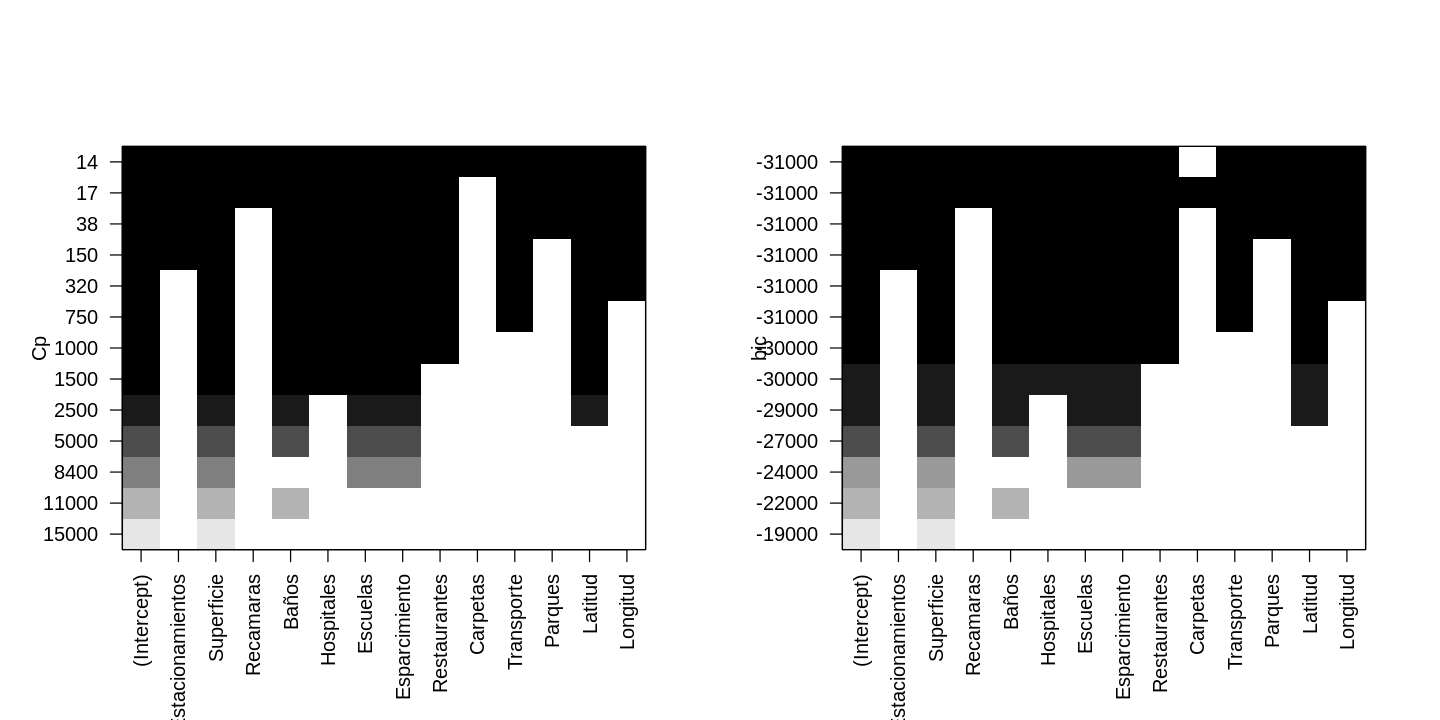

In [95]:
par(mfrow = c(1, 2))
plot(reg.summary$rss, xlab = "N° de variables",
    ylab = "RSS", type = "l")
plot(reg.summary$adjr2, xlab = "N° de variables",
    ylab = "Adjusted RSq", type = "l")

which.max(reg.summary$adjr2)
points(11, reg.summary$adjr2[11], col = "red", cex = 2,
    pch = 20)

plot(reg.summary$cp, xlab = "N° de variables",
    ylab = "Cp", type = "l")

which.min(reg.summary$cp)

points(10, reg.summary$cp[10], col = "red", cex = 2,
    pch = 20)

which.min(reg.summary$bic)

plot(reg.summary$bic, xlab = "N° de variables",
    ylab = "BIC", type = "l")

points(6, reg.summary$bic[6], col = "red", cex = 2,
    pch = 20)

plot(regfit.full, scale = "r2")
plot(regfit.full, scale = "adjr2")
plot(regfit.full, scale = "Cp")
plot(regfit.full, scale = "bic")

coef(regfit.full, 6)

### Eliminacion delantera y posterior

In [96]:
regfit.fwd <- regsubsets(Precio_MXN ~ ., data = df,
    nvmax = 14, method = "forward")

summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Precio_MXN ~ ., data = df, nvmax = 14, method = "forward")
13 Variables  (and intercept)
                 Forced in Forced out
Estacionamientos     FALSE      FALSE
Superficie           FALSE      FALSE
Recamaras            FALSE      FALSE
Baños                FALSE      FALSE
Hospitales           FALSE      FALSE
Escuelas             FALSE      FALSE
Esparcimiento        FALSE      FALSE
Restaurantes         FALSE      FALSE
Carpetas             FALSE      FALSE
Transporte           FALSE      FALSE
Parques              FALSE      FALSE
Latitud              FALSE      FALSE
Longitud             FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: forward
          Estacionamientos Superficie Recamaras Baños Hospitales Escuelas
1  ( 1 )  " "              "*"        " "       " "   " "        " "     
2  ( 1 )  " "              "*"        " "       "*"   " "        " "     
3  ( 1 )  " "              "*"        " "      

In [97]:
regfit.bwd <- regsubsets(Precio_MXN ~ ., data = df,
    nvmax = 14, method = "backward")

summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Precio_MXN ~ ., data = df, nvmax = 14, method = "backward")
13 Variables  (and intercept)
                 Forced in Forced out
Estacionamientos     FALSE      FALSE
Superficie           FALSE      FALSE
Recamaras            FALSE      FALSE
Baños                FALSE      FALSE
Hospitales           FALSE      FALSE
Escuelas             FALSE      FALSE
Esparcimiento        FALSE      FALSE
Restaurantes         FALSE      FALSE
Carpetas             FALSE      FALSE
Transporte           FALSE      FALSE
Parques              FALSE      FALSE
Latitud              FALSE      FALSE
Longitud             FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: backward
          Estacionamientos Superficie Recamaras Baños Hospitales Escuelas
1  ( 1 )  " "              "*"        " "       " "   " "        " "     
2  ( 1 )  " "              "*"        " "       " "   " "        " "     
3  ( 1 )  " "              "*"        " "    

In [98]:
print(coef(regfit.full, 6))
print("\n")
print(coef(regfit.fwd, 6))
print("\n")
print(coef(regfit.bwd, 6))

  (Intercept)    Superficie         Baños    Hospitales      Escuelas 
 257171788.27      19065.99    1367165.05     129894.71     -47835.31 
Esparcimiento       Latitud 
    139146.29  -13045023.97 
[1] "\n"
  (Intercept)    Superficie         Baños    Hospitales      Escuelas 
 257171788.27      19065.99    1367165.05     129894.71     -47835.31 
Esparcimiento       Latitud 
    139146.29  -13045023.97 
[1] "\n"
  (Intercept)    Superficie         Baños    Hospitales      Escuelas 
 257171788.27      19065.99    1367165.05     129894.71     -47835.31 
Esparcimiento       Latitud 
    139146.29  -13045023.97 


In [99]:
variables_optimas <- c("Precio_MXN", "Superficie", "Baños", "Hospitales", "Escuelas", "Esparcimiento", "Latitud")

df_optimo <- df[, variables_optimas]

head(df_optimo)
str(df_optimo)

Precio_MXN Superficie Baños Hospitales Escuelas Esparcimiento Latitud 
1 2586432     64        2      6         102      2             19.47045
2 3400000    100        2      9         140      5             19.47312
3 3400000     78        2      6         102      2             19.47045
4 2300000     60        1      6         102      2             19.47045
5 3500000     76        2      1          82      3             19.48748
6 3400000     76        2     10         118      5             19.48864

tibble [40,834 × 7] (S3: tbl_df/tbl/data.frame)
 $ Precio_MXN   : num [1:40834] 2586432 3400000 3400000 2300000 3500000 ...
 $ Superficie   : num [1:40834] 64 100 78 60 76 76 54 64 55 67 ...
 $ Baños        : num [1:40834] 2 2 2 1 2 2 2 2 1 2 ...
 $ Hospitales   : num [1:40834] 6 9 6 6 1 10 10 1 5 10 ...
 $ Escuelas     : num [1:40834] 102 140 102 102 82 118 111 82 76 118 ...
 $ Esparcimiento: num [1:40834] 2 5 2 2 3 5 6 3 0 5 ...
 $ Latitud      : num [1:40834] 19.5 19.5 19.5 19.5 19.5 ...


In [100]:
df_checkpoint3 <- df

In [101]:
df <- df_checkpoint3

# Ridge y Lasso

In [102]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [103]:
library(glmnet)

In [104]:
df <- df %>% drop_na()
x <- as.matrix(df %>% dplyr::select(-Precio_MXN))
y <- df$Precio_MXN

# Ridge
ridge <- glmnet(x, y, alpha = 0)
cv.ridge <- cv.glmnet(x, y, alpha = 0)
coef(cv.ridge, s = "lambda.min")

# Lasso
lasso <- glmnet(x, y, alpha = 1)
cv.lasso <- cv.glmnet(x, y, alpha = 1)
coef(cv.lasso, s = "lambda.min")

14 x 1 sparse Matrix of class "dgCMatrix"
                    lambda.min
(Intercept)      -7.389727e+08
Estacionamientos  2.314474e+05
Superficie        1.702918e+04
Recamaras         1.959632e+05
Baños             1.240271e+06
Hospitales        1.290253e+05
Escuelas         -3.035745e+04
Esparcimiento     1.120706e+05
Restaurantes     -1.460804e+03
Carpetas         -5.572908e+01
Transporte        8.736869e+03
Parques           2.155182e+04
Latitud          -1.152557e+07
Longitud         -9.723652e+06

14 x 1 sparse Matrix of class "dgCMatrix"
                    lambda.min
(Intercept)      -6.233914e+08
Estacionamientos  2.011750e+05
Superficie        1.806212e+04
Recamaras         1.365373e+05
Baños             1.218031e+06
Hospitales        1.841473e+05
Escuelas         -3.350714e+04
Esparcimiento     1.526826e+05
Restaurantes     -3.085150e+03
Carpetas         -5.902797e+01
Transporte        1.009080e+04
Parques           1.723097e+04
Latitud          -1.150932e+07
Longitud         -8.560517e+06

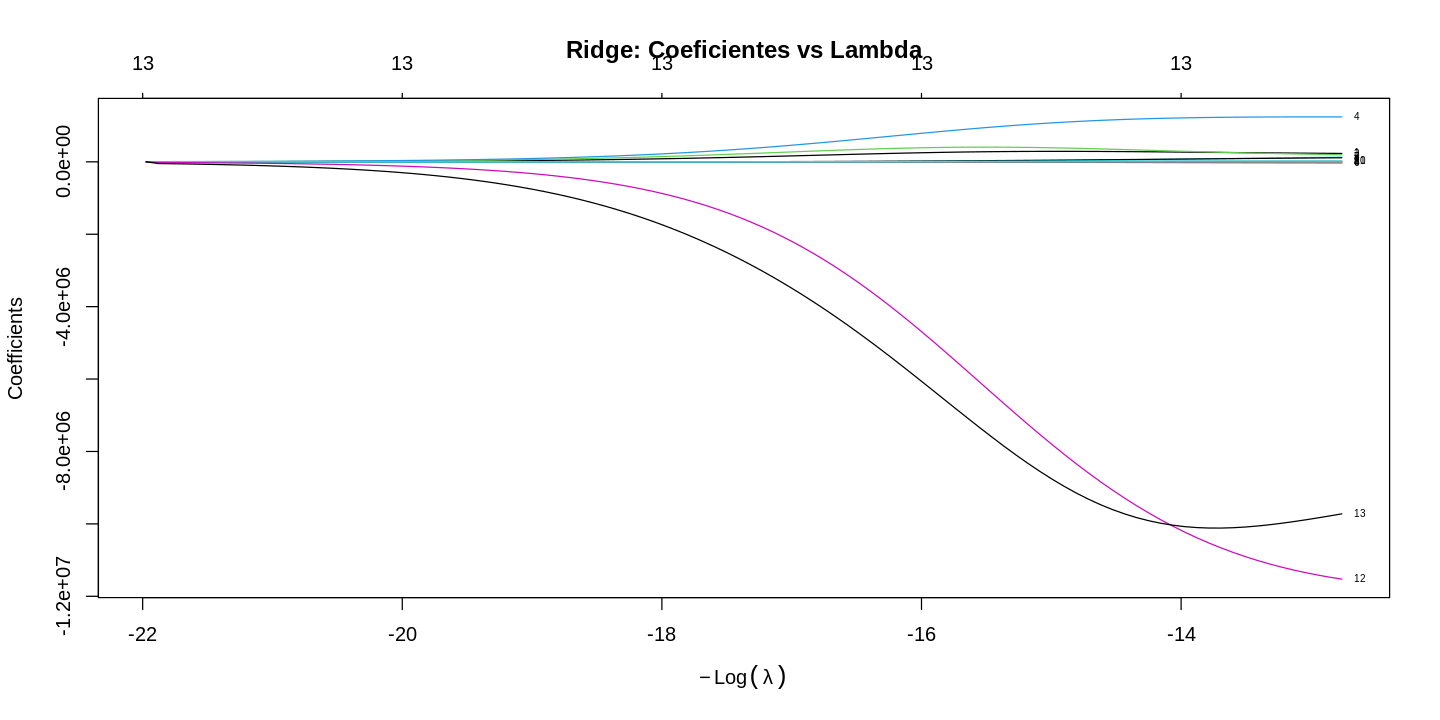

In [105]:
# Gráfica de coeficientes Ridge vs lambda
plot(ridge, xvar = "lambda", label = TRUE, main = "Ridge: Coeficientes vs Lambda")

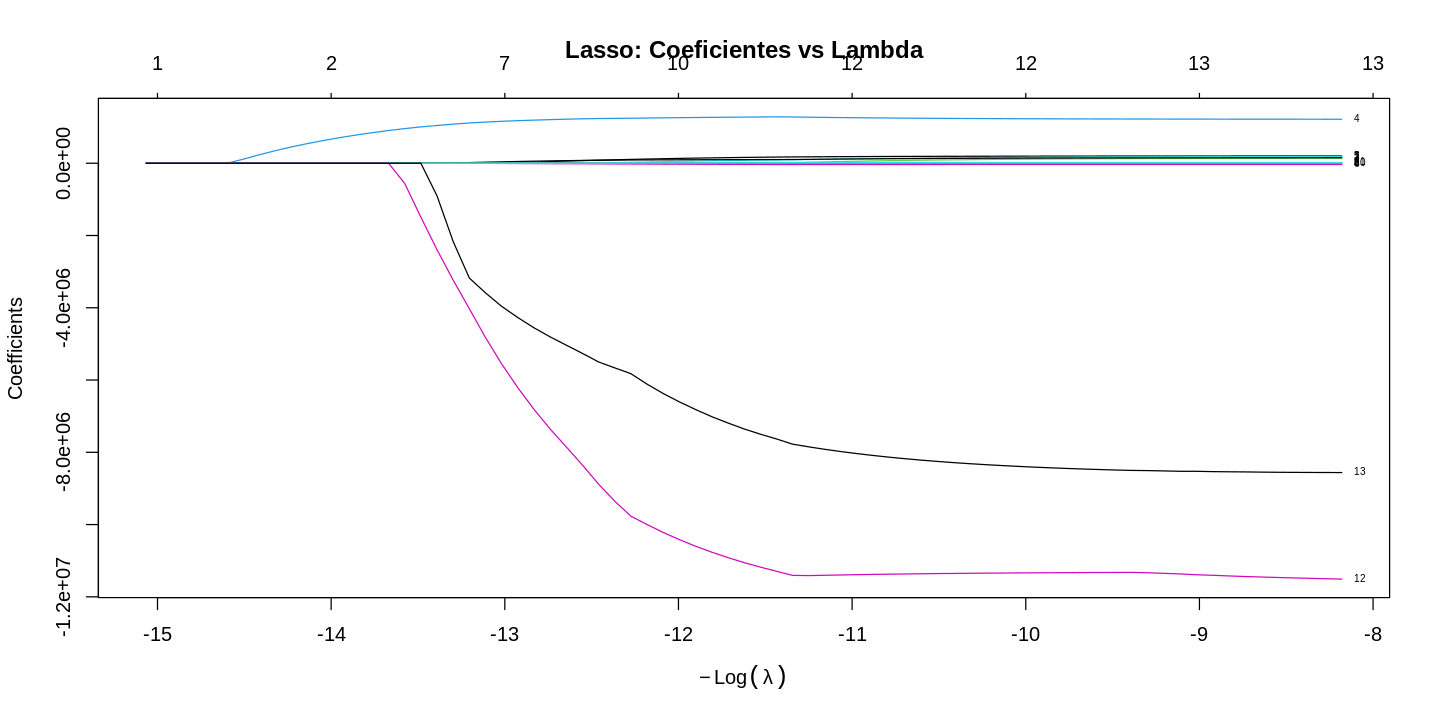

In [106]:
# Gráfica de coeficientes Lasso vs lambda
plot(lasso, xvar = "lambda", label = TRUE, main = "Lasso: Coeficientes vs Lambda")

In [107]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [108]:
library(caret)

In [109]:
set.seed(0)
train_control <- trainControl(method = "cv", number = 10)
model_cv <- train(log(Precio_MXN) ~ ., data = df, method = "lm", trControl = train_control)
print(model_cv)

Linear Regression 

40832 samples
   13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 36748, 36750, 36749, 36749, 36748, 36749, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.4000614  0.6063106  0.3072692

Tuning parameter 'intercept' was held constant at a value of TRUE


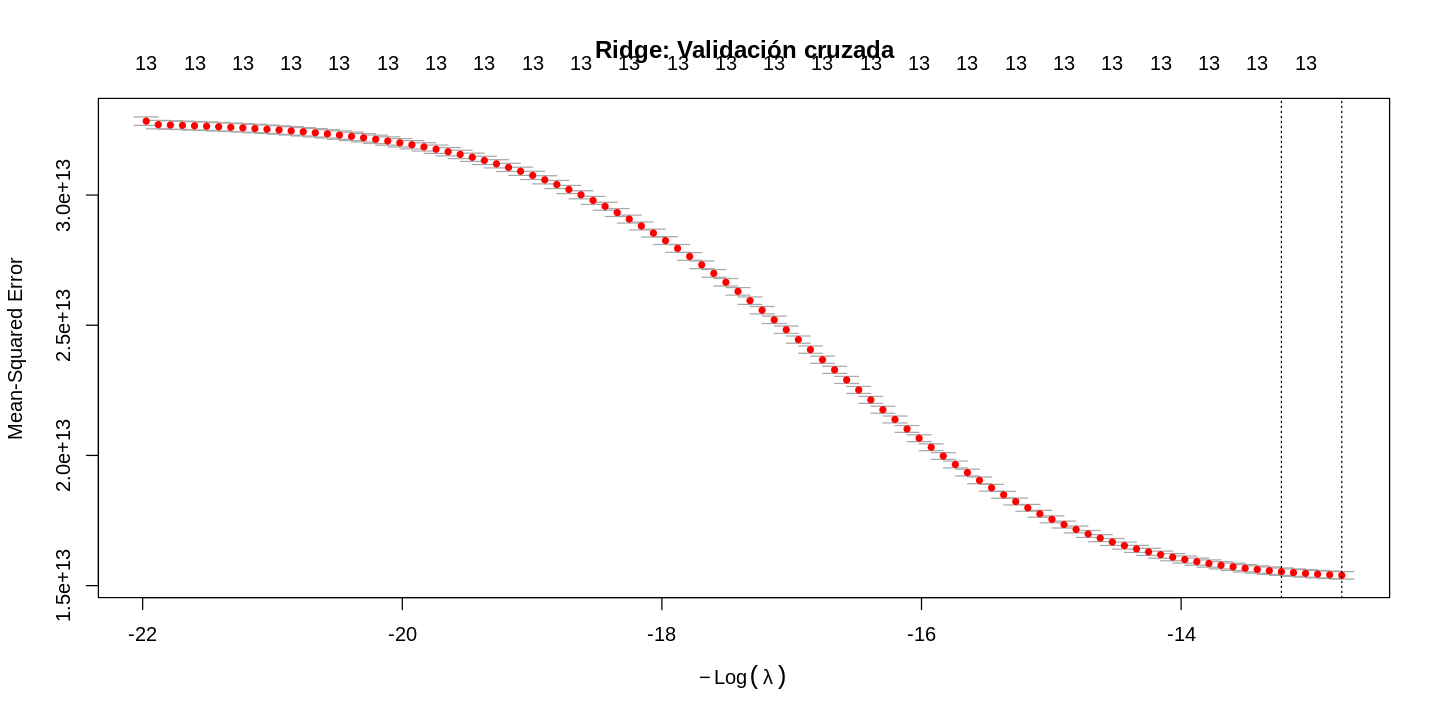

In [110]:
plot(cv.ridge, main = "Ridge: Validación cruzada")

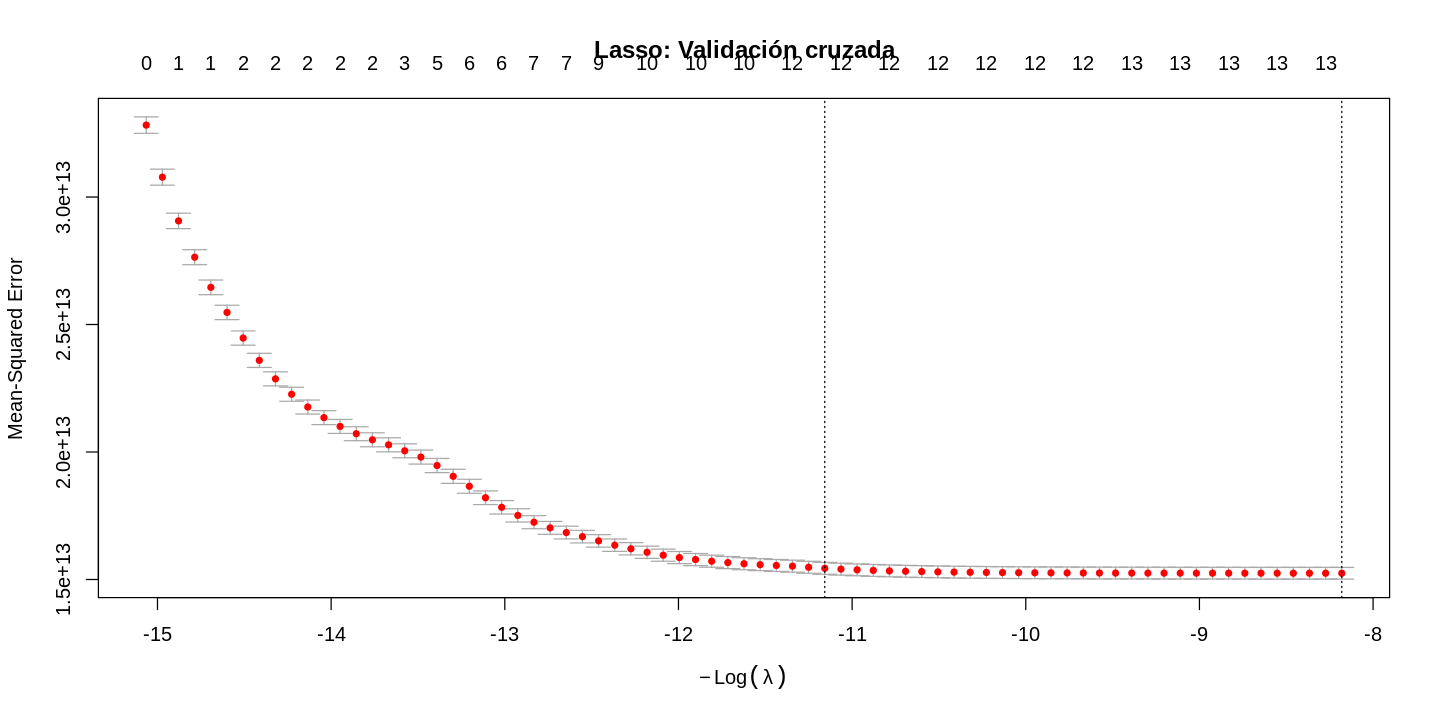

In [111]:
plot(cv.lasso, main = "Lasso: Validación cruzada")

In [112]:
df_clean <- df %>% drop_na()
x_cv <- as.matrix(df_clean %>% dplyr::select(-Precio_MXN))
y_cv <- df_clean$Precio_MXN
y_cv <- log(y_cv)

cat("--- Ridge (alpha = 0) con VC ---\n")
set.seed(123)
cv.ridge <- cv.glmnet(x_cv, y_cv, alpha = 0, family = "gaussian")

lambda_min_ridge <- cv.ridge$lambda.min
cat("lambda optimo para Ridge:", lambda_min_ridge, "\n")

rmse_ridge <- sqrt(cv.ridge$cvm[cv.ridge$lambda == lambda_min_ridge])
cat("RMSE Ridge:", rmse_ridge, "\n")

cat("Coeficientes de Ridge:\n")
print(coef(cv.ridge, s = "lambda.min"))

cat("\n--- Lasso (alpha = 1) con VC ---\n")
set.seed(123)
cv.lasso <- cv.glmnet(x_cv, y_cv, alpha = 1, family = "gaussian")

lambda_min_lasso <- cv.lasso$lambda.min
cat("lambda optimo para Lasso:", lambda_min_lasso, "\n")

rmse_lasso <- sqrt(cv.lasso$cvm[cv.lasso$lambda == lambda_min_lasso])
cat("RMSE Lasso:", rmse_lasso, "\n")

cat("Coeficientes de Lasso:\n")
print(coef(cv.lasso, s = "lambda.min"))

--- Ridge (alpha = 0) con VC ---
lambda optimo para Ridge: 0.03897842 
RMSE Ridge: 0.4031624 
Coeficientes de Ridge:
14 x 1 sparse Matrix of class "dgCMatrix"
                    lambda.min
(Intercept)      -1.455607e+02
Estacionamientos  2.334063e-02
Superficie        1.751462e-03
Recamaras         4.582673e-02
Baños             1.586694e-01
Hospitales        2.025235e-02
Escuelas         -3.110305e-03
Esparcimiento     1.402741e-02
Restaurantes     -1.996440e-04
Carpetas         -9.839965e-06
Transporte        9.104646e-04
Parques           1.829367e-03
Latitud          -1.565758e+00
Longitud         -1.923961e+00

--- Lasso (alpha = 1) con VC ---
lambda optimo para Lasso: 0.0004378539 
RMSE Lasso: 0.4000631 
Coeficientes de Lasso:
14 x 1 sparse Matrix of class "dgCMatrix"
                    lambda.min
(Intercept)      -1.395329e+02
Estacionamientos  1.937545e-02
Superficie        1.837286e-03
Recamaras         4.285518e-02
Baños             1.560100e-01
Hospitales        2.791597e-

In [113]:
predictions_ridge <- predict(cv.ridge, s = "lambda.min", newx = x_cv)

ss_total_ridge <- sum((y_cv - mean(y_cv))^2)
ss_residual_ridge <- sum((y_cv - predictions_ridge)^2)
r_squared_ridge <- 1 - (ss_residual_ridge / ss_total_ridge)

cat("R^2 para Ridge:", r_squared_ridge, "\n\n")

predictions_lasso <- predict(cv.lasso, s = "lambda.min", newx = x_cv)

ss_total_lasso <- sum((y_cv - mean(y_cv))^2)
ss_residual_lasso <- sum((y_cv - predictions_lasso)^2)
r_squared_lasso <- 1 - (ss_residual_lasso / ss_total_lasso)

cat("R^2 para Lasso:", r_squared_lasso, "\n")

R^2 para Ridge: 0.6002401 

R^2 para Lasso: 0.6064043 


## GLM POISSON

Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 23315475.690000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 23315475.690000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 19890338.130000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 19890338.130000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 23315276.790000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 23315276.790000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 23315276.790000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 23315276.790000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 20813015.340000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 20813015.340000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 16872368.760000”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 16872368.760000”
Warning message in dpois(y, mu, log = TRUE):
“non-in


Call:
glm(formula = Precio_MXN ~ ., family = poisson(link = "sqrt"), 
    data = df)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.375e+05  5.167e+00  -26606   <2e-16 ***
Estacionamientos  3.173e+01  2.038e-03   15568   <2e-16 ***
Superficie        2.865e+00  2.388e-05  119971   <2e-16 ***
Recamaras         4.227e+01  3.914e-03   10800   <2e-16 ***
Baños             2.084e+02  3.651e-03   57091   <2e-16 ***
Hospitales        3.550e+01  6.645e-04   53418   <2e-16 ***
Escuelas         -5.296e+00  1.254e-04  -42225   <2e-16 ***
Esparcimiento     2.711e+01  4.003e-04   67734   <2e-16 ***
Restaurantes     -5.744e-01  2.803e-05  -20495   <2e-16 ***
Carpetas         -2.238e-02  5.771e-06   -3877   <2e-16 ***
Transporte        1.679e+00  6.673e-05   25167   <2e-16 ***
Parques           2.704e+00  2.140e-04   12639   <2e-16 ***
Latitud          -2.164e+03  4.299e-02  -50322   <2e-16 ***
Longitud         -1.827e+03  5.149e-02  -35480   <2e-16 ***

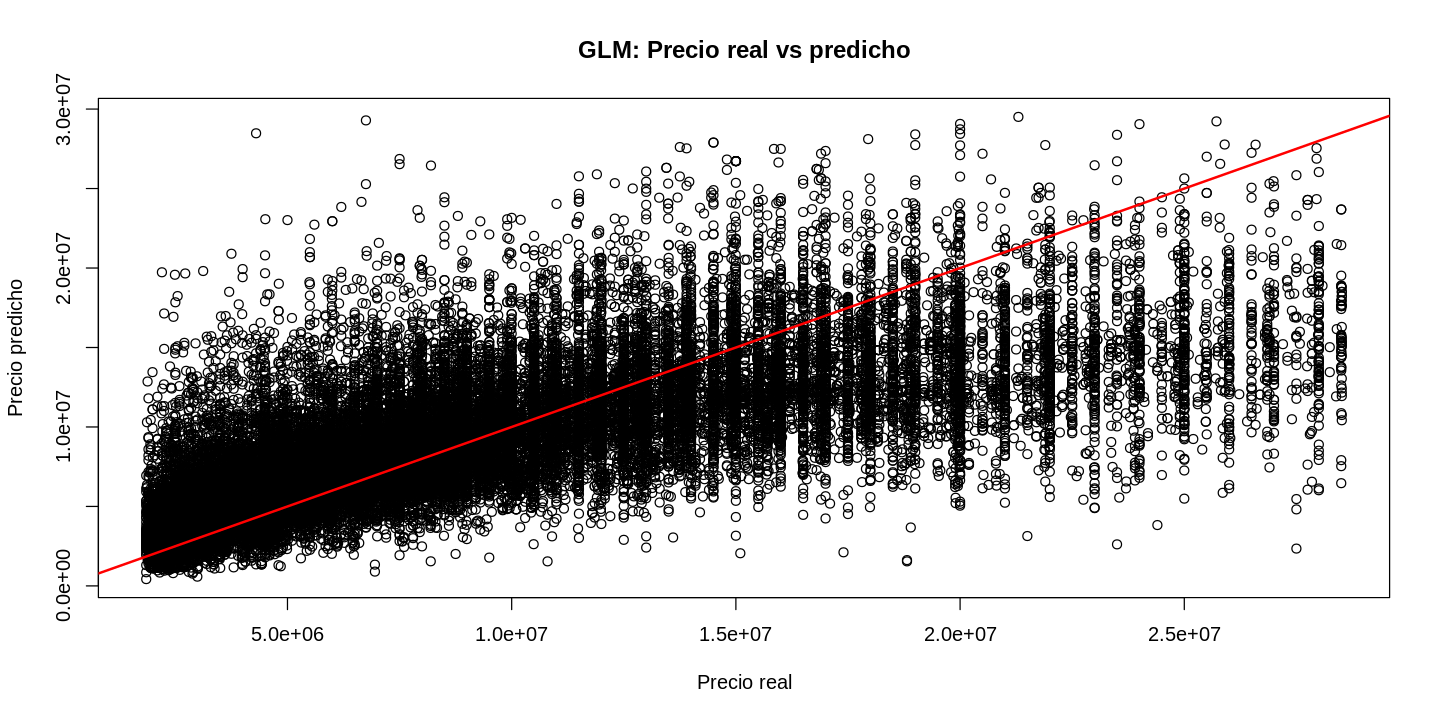

In [114]:
glm_model <- glm(Precio_MXN ~ ., data = df, family = poisson(link = "sqrt"))

summary(glm_model)

predicciones <- predict(glm_model, type = "response")

plot(df$Precio_MXN, predicciones,
     xlab = "Precio real",
     ylab = "Precio predicho",
     main = "GLM: Precio real vs predicho")
abline(0, 1, col = "red", lwd = 2)

In [115]:
mse <- sqrt(mean((df$Precio_MXN - predicciones)^2))
cat("RMSE:", mse, "\n")

mae <- mean(abs(df$Precio_MXN - predicciones))
cat("MAE:", mae, "\n")

residual_deviance <- glm_model$deviance
null_deviance <- glm_model$null.deviance
r2 <- (1 - (residual_deviance / null_deviance))
cat("Pseudo R^2:", r2, "\n")

RMSE: 3912460 
MAE: 2718673 
Pseudo R^2: 0.5875807 


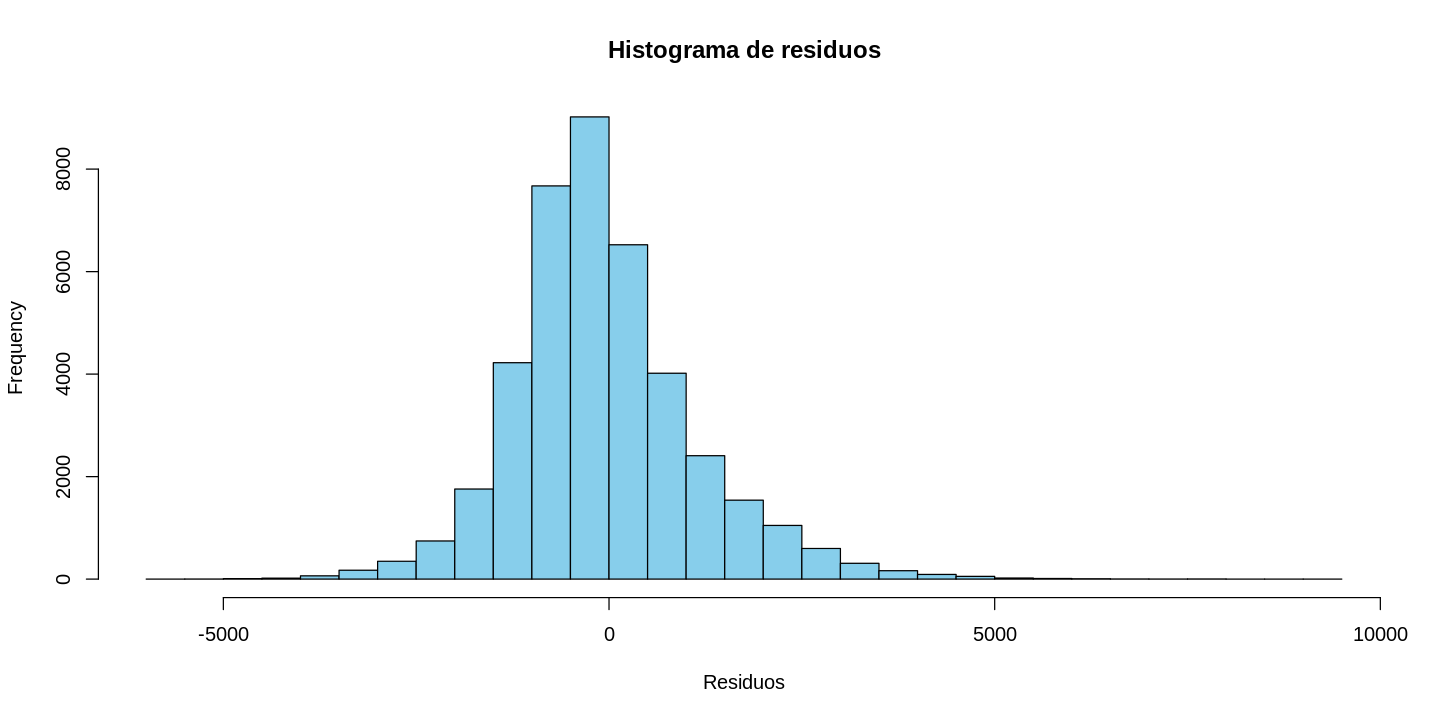

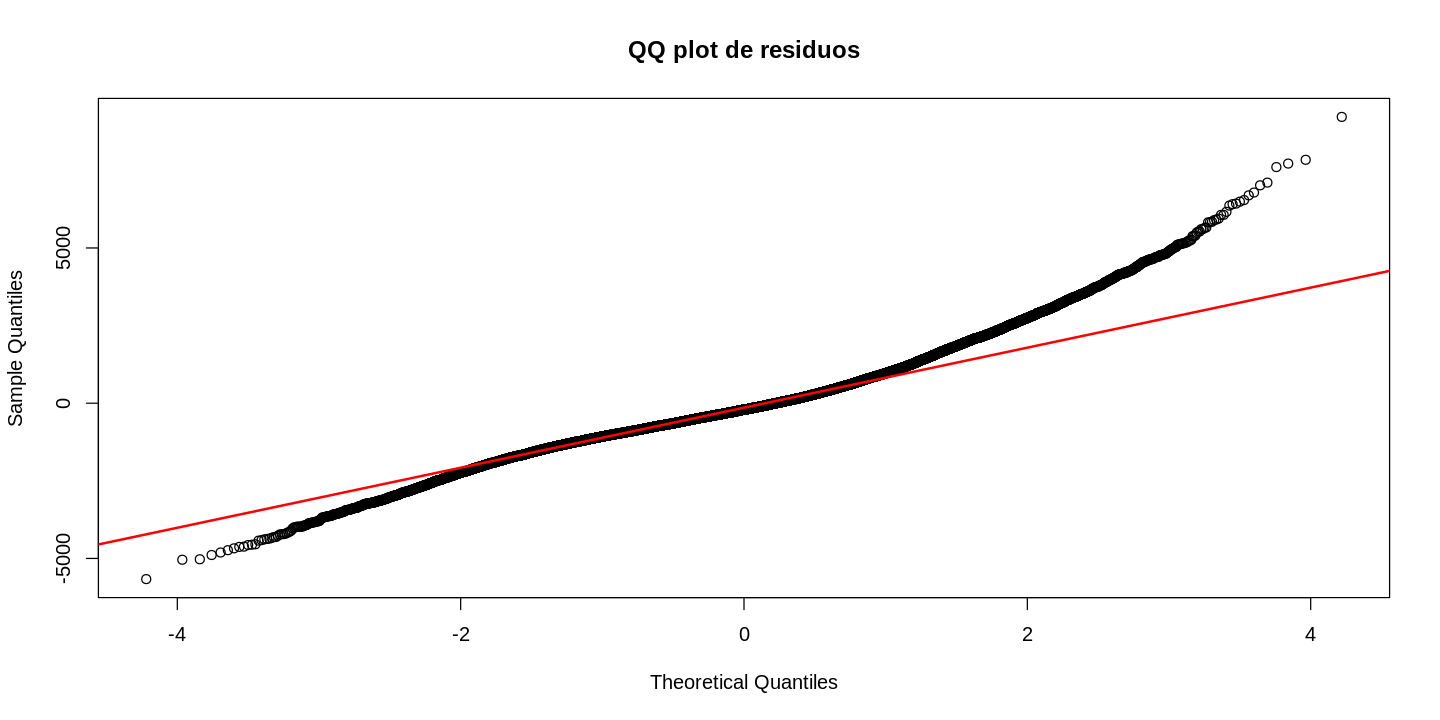

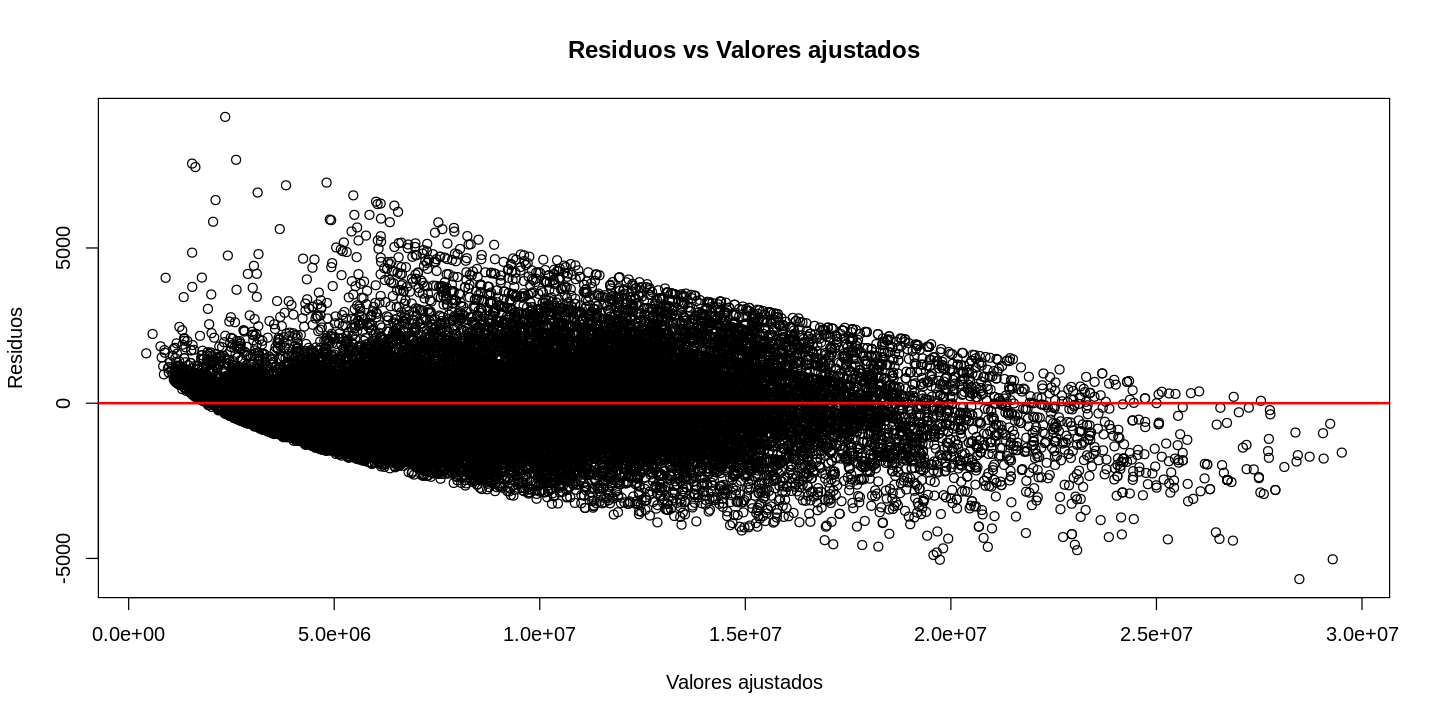

In [116]:
# Residuos del modelo
residuos <- residuals(glm_model, type = "deviance")

# Histograma de residuos
hist(residuos, main = "Histograma de residuos", xlab = "Residuos", breaks = 30, col = "skyblue")

# QQ plot de residuos
qqnorm(residuos, main = "QQ plot de residuos")
qqline(residuos, col = "red", lwd = 2)

# Gráfica de residuos vs valores ajustados
plot(fitted(glm_model), residuos,
     xlab = "Valores ajustados",
     ylab = "Residuos",
     main = "Residuos vs Valores ajustados")
abline(h = 0, col = "red", lwd = 2)

## GLM GAMMA


Call:
glm(formula = Precio_MXN ~ ., family = Gamma(link = "sqrt"), 
    data = df)

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -8.421e+04  5.274e+03 -15.968  < 2e-16 ***
Estacionamientos  2.946e+01  2.570e+00  11.463  < 2e-16 ***
Superficie        3.124e+00  3.327e-02  93.918  < 2e-16 ***
Recamaras         3.968e+01  4.517e+00   8.784  < 2e-16 ***
Baños             2.195e+02  4.512e+00  48.651  < 2e-16 ***
Hospitales        3.169e+01  7.247e-01  43.727  < 2e-16 ***
Escuelas         -4.359e+00  1.329e-01 -32.792  < 2e-16 ***
Esparcimiento     2.231e+01  4.221e-01  52.864  < 2e-16 ***
Restaurantes     -4.617e-01  2.804e-02 -16.466  < 2e-16 ***
Carpetas         -2.950e-02  6.051e-03  -4.875 1.09e-06 ***
Transporte        1.563e+00  7.128e-02  21.927  < 2e-16 ***
Parques           2.503e+00  2.477e-01  10.105  < 2e-16 ***
Latitud          -2.039e+03  4.616e+01 -44.174  < 2e-16 ***
Longitud         -1.265e+03  5.231e+01 -24.174  < 2e-16 ***
-

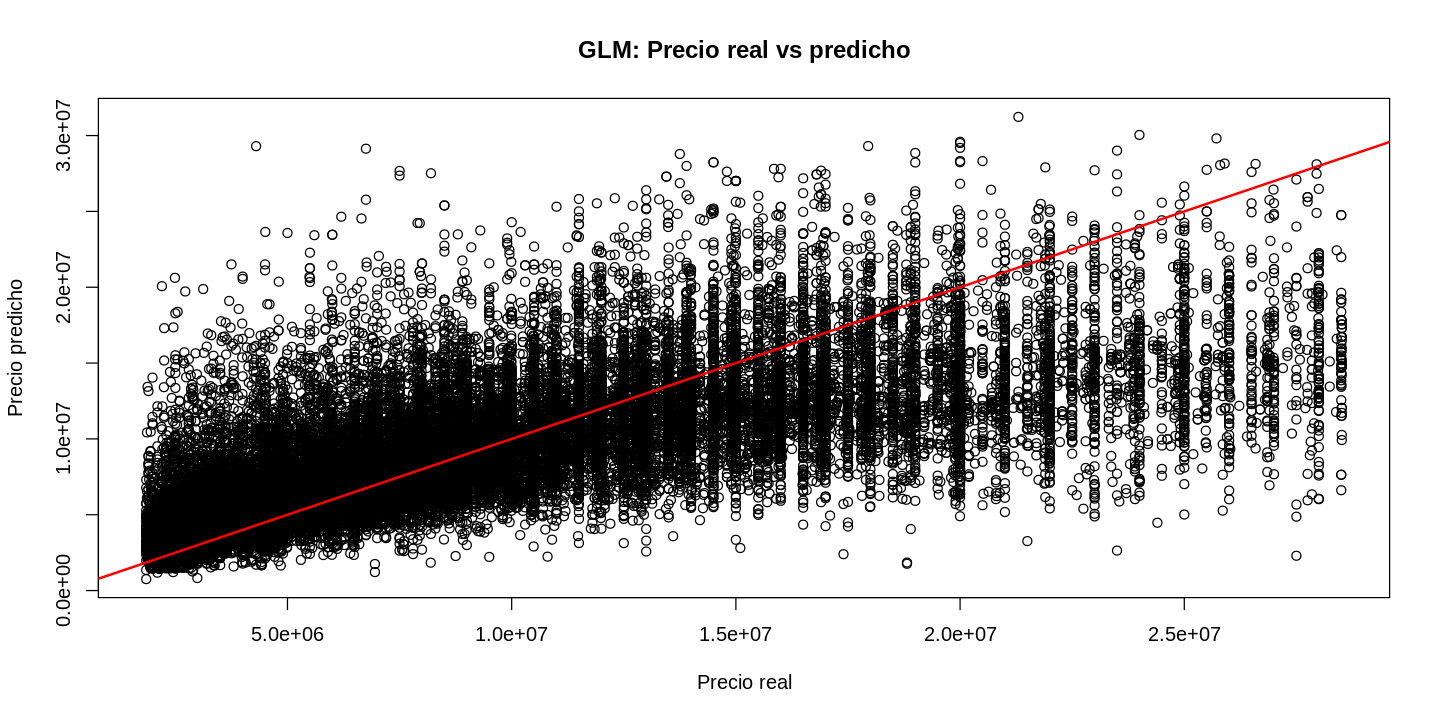

In [117]:
glm_model <- glm(Precio_MXN ~ ., data = df, family = Gamma(link = "sqrt"))

summary(glm_model)

predicciones <- predict(glm_model, type = "response")

plot(df$Precio_MXN, predicciones,
     xlab = "Precio real",
     ylab = "Precio predicho",
     main = "GLM: Precio real vs predicho")
abline(0, 1, col = "red", lwd = 2)

In [118]:
mse <- sqrt(mean((df$Precio_MXN - predicciones)^2))
cat("RMSE:", mse, "\n")

mae <- mean(abs(df$Precio_MXN - predicciones))
cat("MAE:", mae, "\n")

residual_deviance <- glm_model$deviance
null_deviance <- glm_model$null.deviance
r2 <- (1 - (residual_deviance / null_deviance))
cat("Pseudo R^2:", r2, "\n")

RMSE: 3965683 
MAE: 2719704 
Pseudo R^2: 0.5995113 


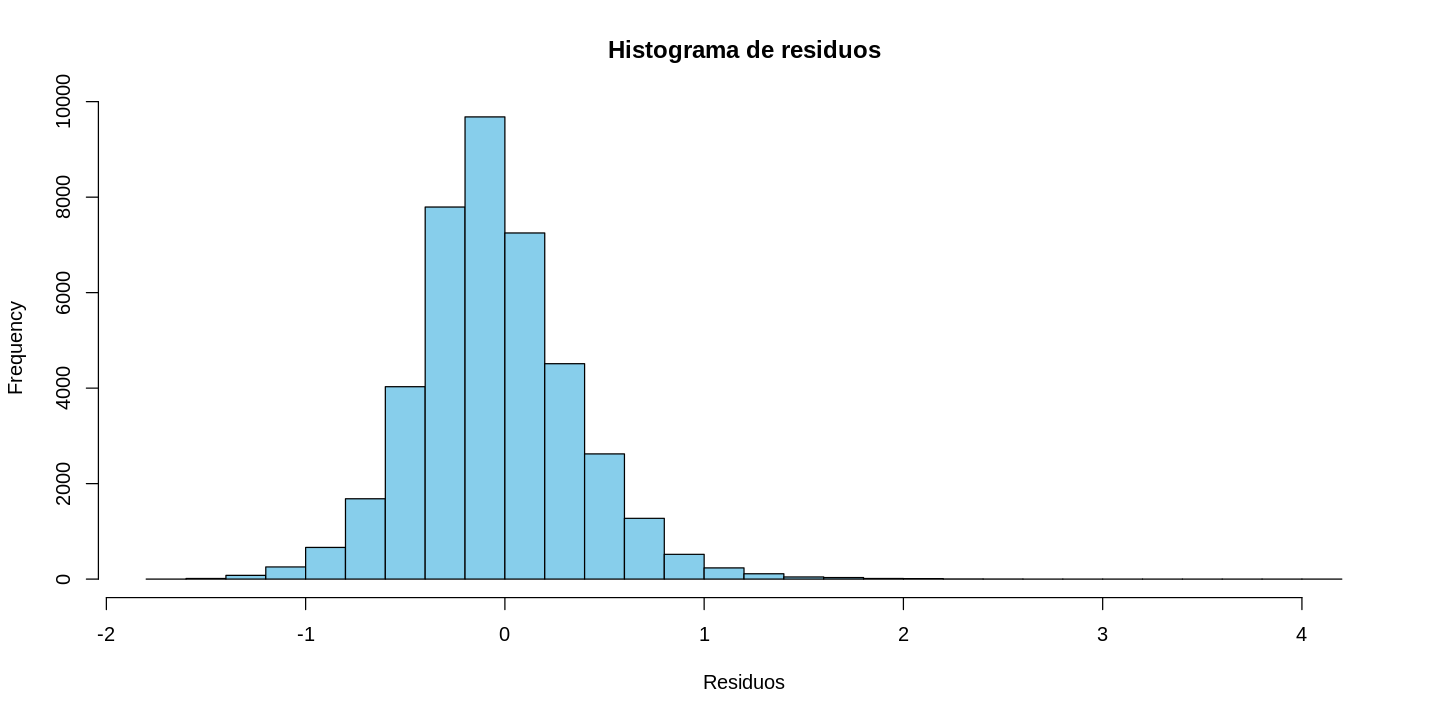

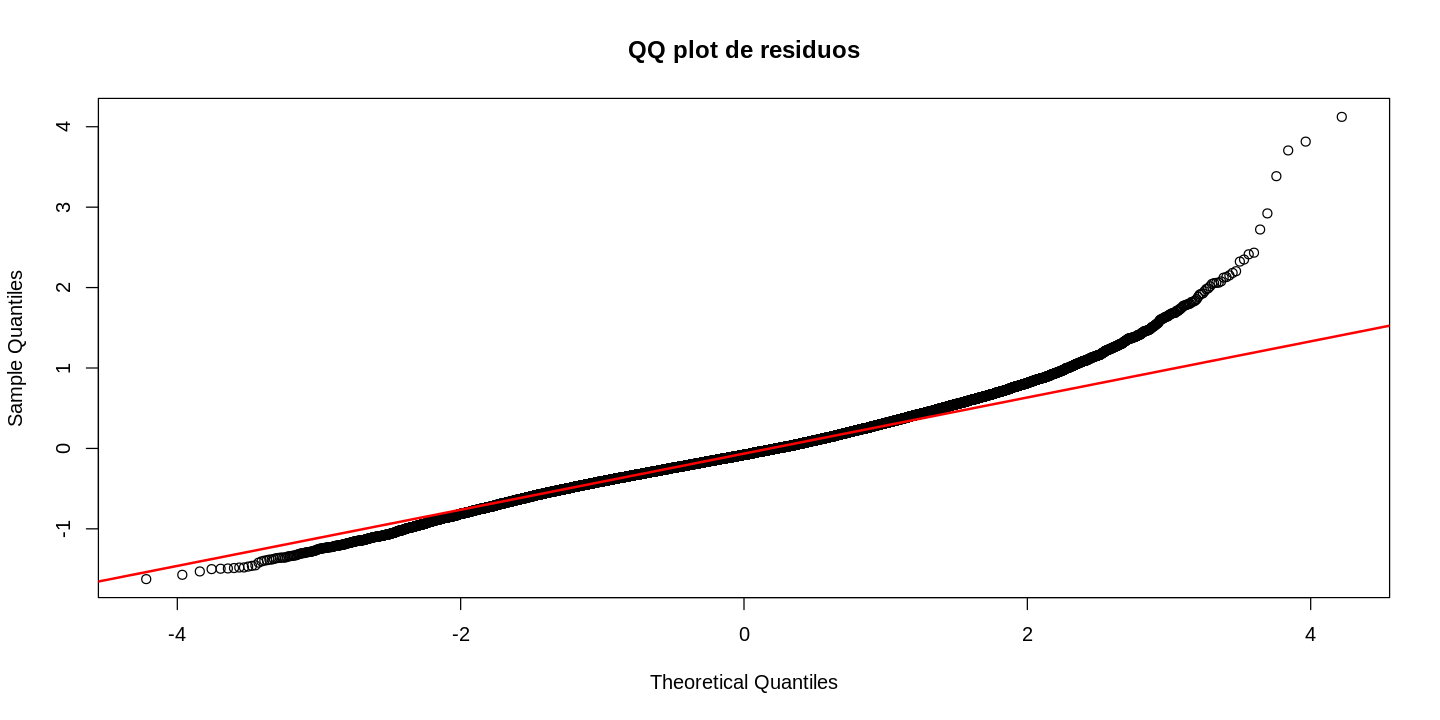

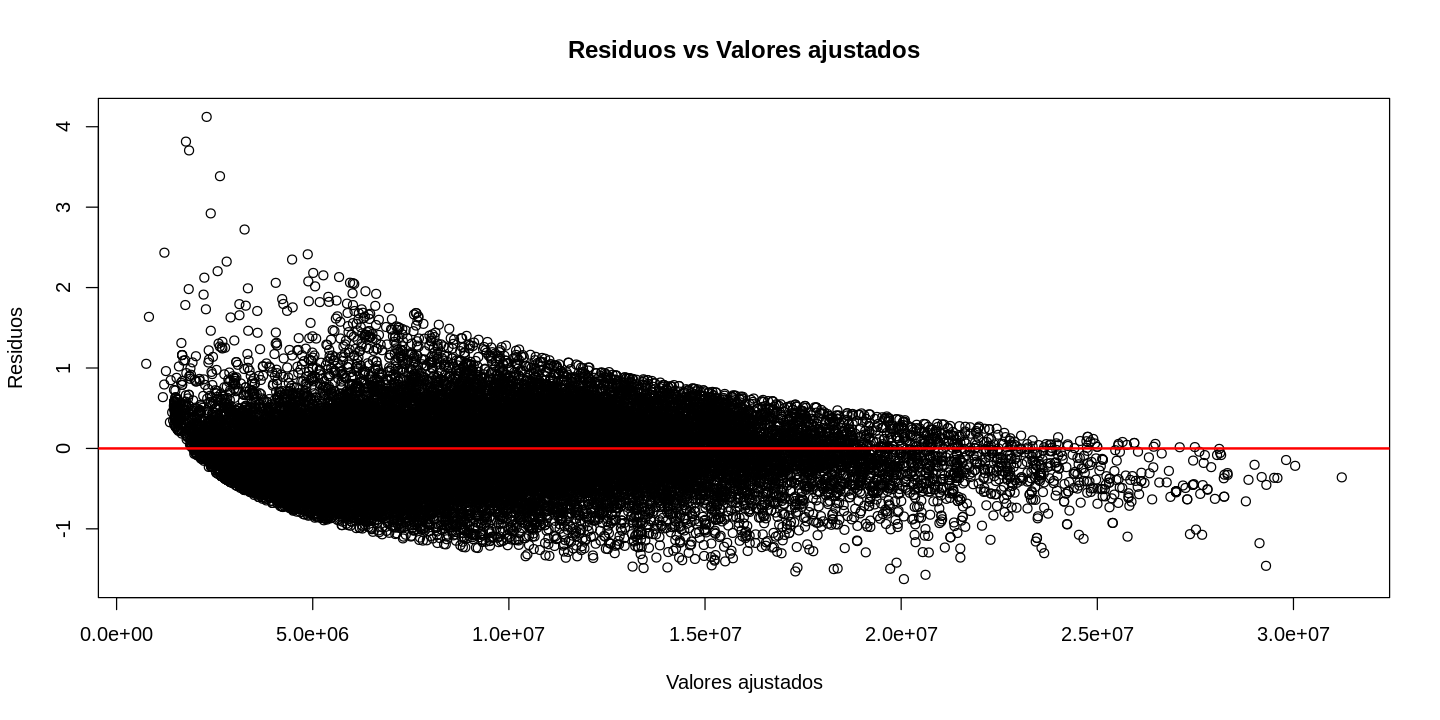

In [119]:
# Residuos del modelo
residuos <- residuals(glm_model, type = "deviance")

# Histograma de residuos
hist(residuos, main = "Histograma de residuos", xlab = "Residuos", breaks = 30, col = "skyblue")

# QQ plot de residuos
qqnorm(residuos, main = "QQ plot de residuos")
qqline(residuos, col = "red", lwd = 2)

# Gráfica de residuos vs valores ajustados
plot(fitted(glm_model), residuos,
     xlab = "Valores ajustados",
     ylab = "Residuos",
     main = "Residuos vs Valores ajustados")
abline(h = 0, col = "red", lwd = 2)